<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        ML- SUPERVISED LEARNING - REGRESSION ALGORITHMS
    </h1>
    </div>

<h2 align="center"><font color=#20a0ff> Scale - Cross Validation - Regularization (Ridge, Lasso, ElasticNet)-Gridsearch </font></h2> 

---
    
<p align="right">
  Duygu Jones | Data Scientist  | May 2024 
    <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</p>


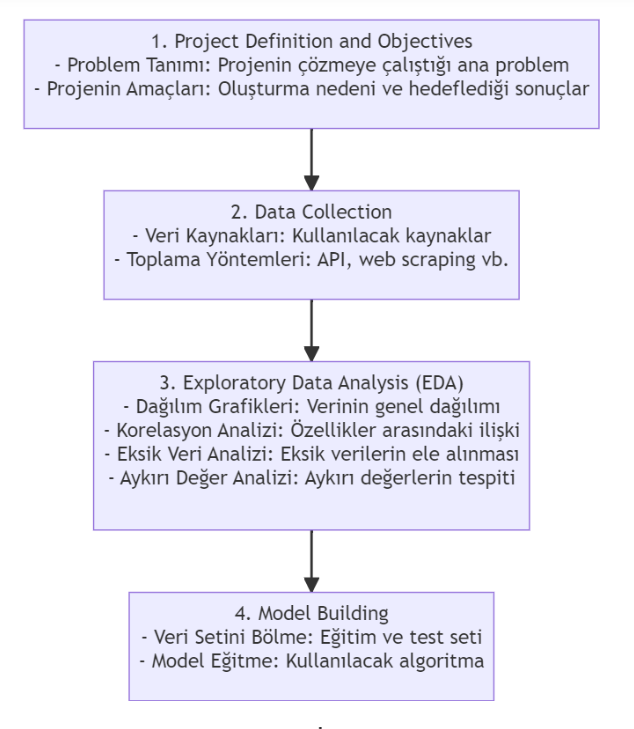
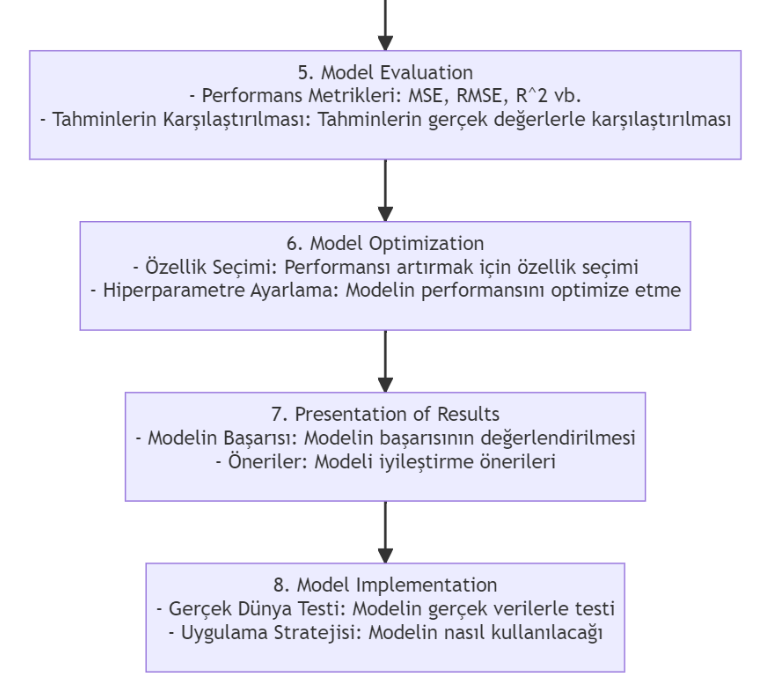

https://medium.com/p/c34dab36dc26

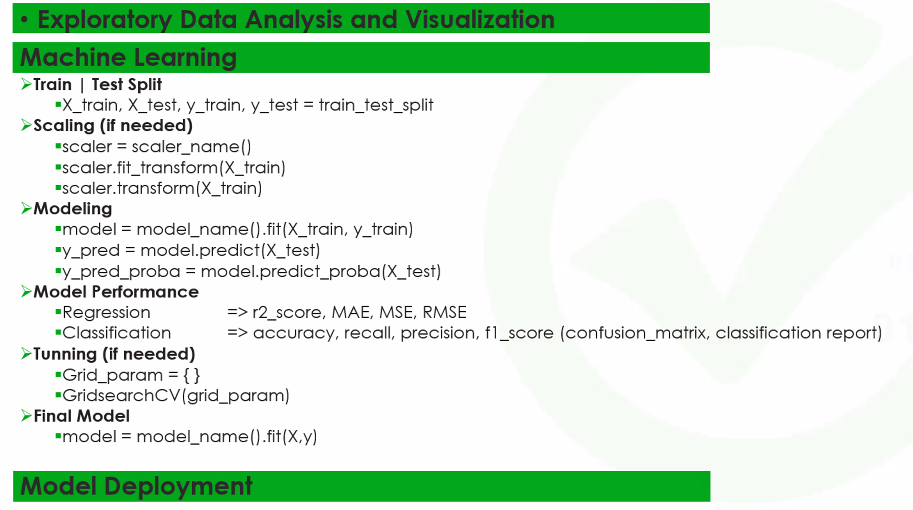

# Import Libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df= pd.read_csv('Advertising.csv')

In [3]:
X = df.drop('sales', axis=1)
y = df.sales

In [5]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


# Data Preprocessing

## Polynomial Conversion

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly_convert = PolynomialFeatures(degree=5, include_bias=False)

In [8]:
poly_features = poly_convert.fit_transform(X)

In [9]:
poly_features.shape

(200, 55)

## Train | Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Note:Scaling

[Standardization vs Normalization 1](https://www.youtube.com/watch?v=sxEqtjLC0aM&ab_channel=NormalizedNerd)

[Standardization vs Normalization 2](https://www.youtube.com/watch?v=bqhQ2LWBheQ&ab_channel=Prof.RyanAhmed)

[Preprocessing Data in Scikit-Learn](https://scikit-learn.org/stable/modules/preprocessing.html)

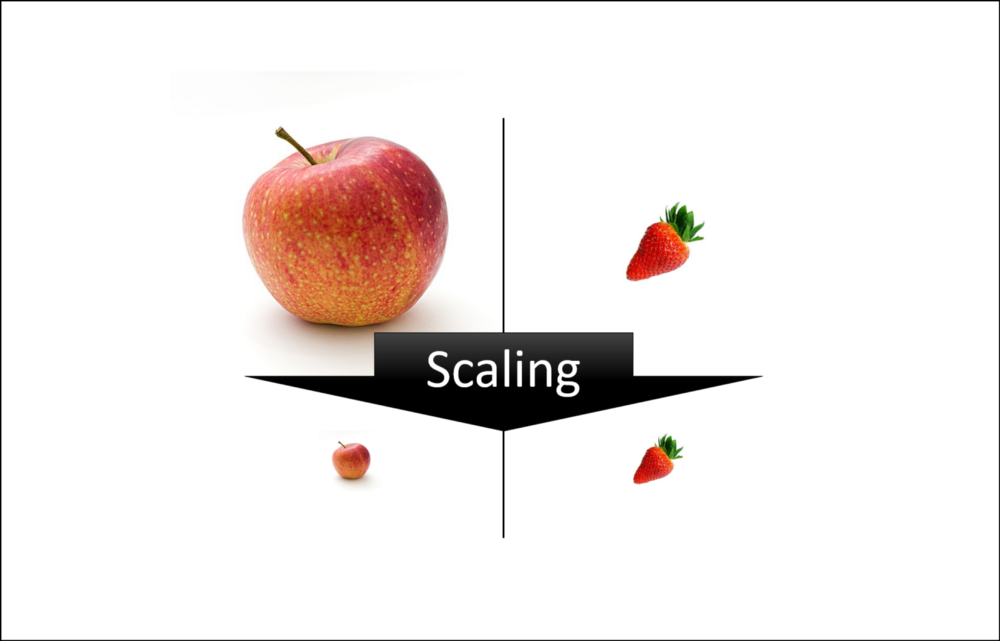

**Ölçekleme: Verilerimizi Aynı Aralıklara Uydurma**

Bir veri kümesindeki featureların aralıkları önemli ölçüde değişebilir. Eğer bu featureları ölçeklendirmezsek, büyük aralıklara sahip olanlar daha fazla ağırlık kazanabilir, bu da özellikle distance based modellerde yanlış sonuçlara yol açar. Ölçekleme, tüm featureların modele eşit şekilde katkıda bulunmasını sağlar.

Ölçeklemenin Avantajları:
- **Yanlış ağırlıklandırmayı önler**: Büyük aralıklara sahip featurelar, küçük aralıklara sahip olanları domine etmez.
- **Gradyan descent hızlandırır**: Lineer ve lojistik regresyon gibi modellerin daha hızlı yakınsamasına yardımcı olur.
- **Feature Importance artırır**: Önemli featureların doğru bir şekilde tespit edilmesini sağlar.

Verilerinize ölçekleme uygulamanın herhangi bir dezavantajı yoktur. Ölçekleme yapıp yapmama konusunda emin değilseniz, doğrudan uygulamak en iyisidir.

**Veri Sızıntısı: Eğitim ve Test Setleri Arasındaki Bilgi Sızıntısını Önleme**

Veri sızıntısı, test setinden gelen bilgilerin yanlışlıkla eğitim setini etkilemesi ve bu durumun iyimser performans tahminlerine yol açması durumudur.

Veri sızıntısını önlemek için:
- **fit** işlemini yalnızca eğitim setine (X_train) uygulayın.
- **transform** işlemini hem eğitim setine (X_train) hem de test setine (X_test) uygulayın, ancak test setine hiçbir zaman fit işlemi uygulamayın.

Unutmayın, hedef değişken hiçbir zaman ölçeklendirilmez.

---

**Scaling: Fitting Our Data to the Same Ranges**

The ranges of features in a dataset can vary significantly. If we don't scale these features, those with larger ranges can be weighted more heavily, especially in distance-based models, leading to incorrect results. Scaling ensures that all features contribute equally to the model.

Advantages of Scaling:
- **Prevents incorrect weighting**: Features with large ranges won't dominate those with smaller ranges.
- **Accelerates Gradient Descent**: Helps models like linear and logistic regression converge faster.
- **Feature Importance**: Improves the accuracy in detecting important features.

There are no disadvantages to applying scaling to your data. If you're unsure whether to scale, it’s best to apply it directly.

**Data Leakage: Preventing Information Leakage Between Training and Test Sets**

Data leakage occurs when information from the test set unintentionally influences the training set, leading to overly optimistic performance estimates. 

To prevent leakage:
- Apply the **fit** operation only on the training set (X_train).
- Apply the **transform** operation on both the training set (X_train) and the test set (X_test), but never fit the test set.

Remember, the target variable is never scaled.

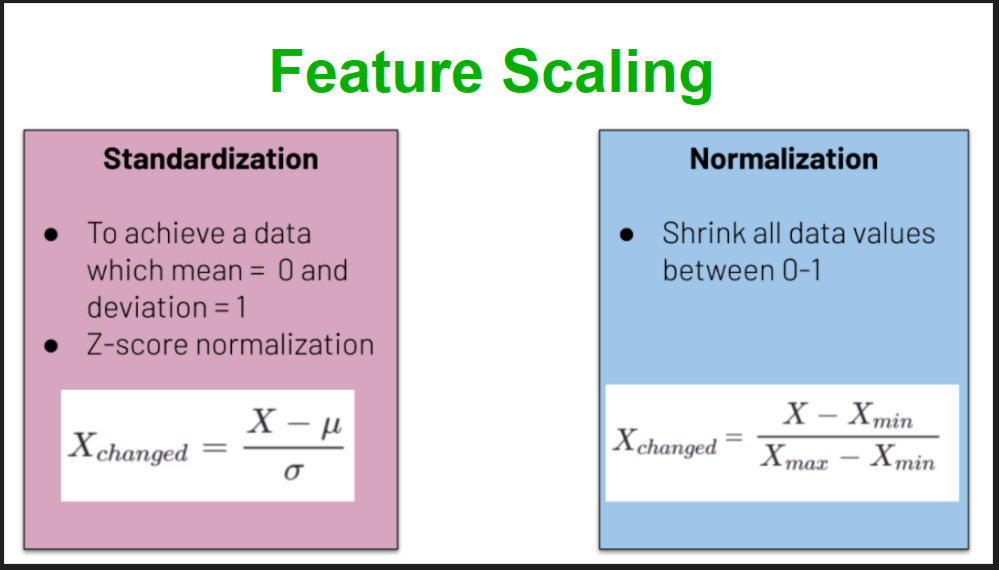

- Robust Scaling;
Outlier fazla oldugu datalarda scale etmek icin kullanilir- IQR degerleri ile hesaplanir

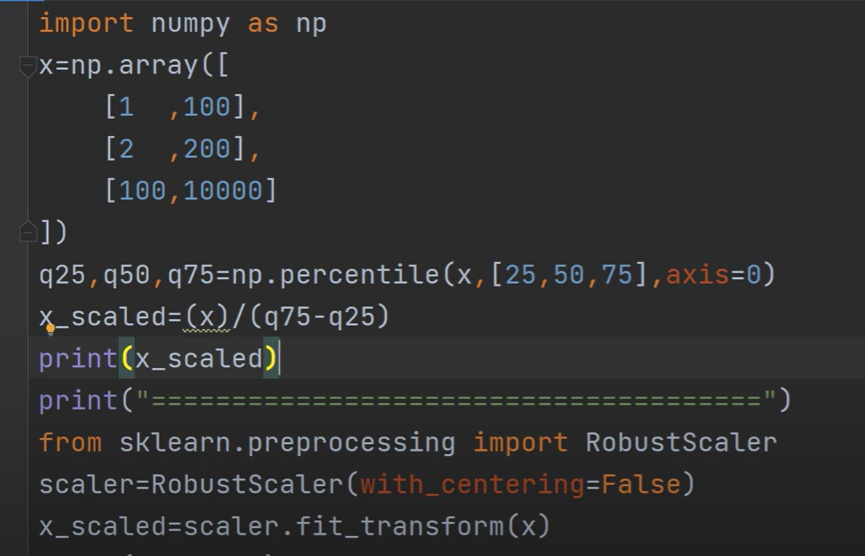

**Robust Scale Nedir?**

Robust scaling, verileri yeniden ölçeklendirirken outlier (aykırı değer) etkisini azaltmayı amaçlayan bir veri ön işleme yöntemidir. Medyan ve interquartile range (IQR) kullanılarak verileri ölçeklendirir.

**Neden Kullanılır?**

1. **Aykırı Değerlerin Etkisini Azaltmak:** Medyan ve IQR kullanımı, outlier'ların etkisini minimize eder.
2. **Verilerin Normalizasyonu:** Verilerin daha homojen bir dağılıma sahip olmasını sağlar.

**Nasıl Çalışır?**

Her veri noktası için medyan çıkarılır ve IQR'ye bölünür:
scaled\_value ={value - median}/{IQR}

**Nerede Kullanılır?**

- **Aykırı Değerlerin Olduğu Veri Setlerinde:** Finans, biyoloji gibi alanlarda sıkça kullanılır.
- **Makine Öğrenimi Modelleri:** Özellikle outlier'ların performansı olumsuz etkilediği modellerde.

**Örnek Kullanım**

```python
from sklearn.preprocessing import RobustScaler
import pandas as pd

veri = pd.DataFrame({'deger': [1, 2, 2, 3, 4, 10]})
scaler = RobustScaler()
scaled_veri = scaler.fit_transform(veri)

print(scaled_veri)
```

Robust scaling, verilerin daha dengeli bir şekilde dağıtılmasını sağlayarak model performansını artırır.

**X**, ölçeklendirme yapılacak olan featuredır.

**X_min**, feature ın minimum değeridir.

**X_max**, feature ın maksimum değeridir.

**X_norm**, normalizasyon sonrası featuredır.

Veri ön işleme adımlarından ikisi olan **standardizasyon** ve **normalizasyon**, verilerin belirli bir ölçeğe getirilmesine yardımcı olur. Bu adımlar, genellikle makine öğrenmesi modellerini eğitirken verilerin dağılımının ve ölçeğinin modelin performansını etkileyebileceği durumlardan kaçınmak için kullanılır.

**Standardizasyon**

**Standardizasyon**, bir veri setinin **feature**’larını ortalaması 0 ve standart sapması 1 olacak şekilde ölçeklendirir. Bu işlem genellikle, bir feature’ın değerlerinden özelliğin ortalamasını çıkararak ve standart sapmasına bölerek gerçekleştirilir. Bu, verinin normal dağılıma daha yakın hale gelmesini sağlar. Standardizasyon, **feature**’lar arasındaki ölçek farklılıklarını düzeltir, bu da bazı algoritmaların (örneğin, **Linear Regression**, **Logistic Regression**, **Support Vector Machines** ve **Neural Networks** gibi) performansını artırabilir. 

Standardizasyonda, veriler **z-skoru** cinsinden yazılır. Bunu yaptıktan sonra tüm **feature**’ların ortalaması 0 ve standart sapması 1 olur. Z-skoru, bir veri noktasının ortalamadan ne kadar uzakta olduğunu gösterir. Ortalama ve standart sapma değerlerinin matematiksel işlemiyle z-skoru pozitif veya negatif değerler alabilir. Yatay eksendeki her sayı bir z-skoruna karşılık gelir ve z-skoru, bir gözlemin ortalamadan (μ) kaç adet standart sapma uzak olduğunu gösterir.

**Normalizasyon**

**Normalizasyon**, veri setinin **feature**’larını 0 ile 1 arasında bir ölçeğe getirir. Bu işlem genellikle, bir feature’ın değerlerinden minimum değerini çıkararak ve ardından bu sonucu maksimum değer ile minimum değer arasındaki farka bölererek gerçekleştirilir. Normalizasyon, verinin belirli bir aralığa sığdırılmasını sağlar ve genellikle **k-NN**, **K-Means** ve **Neural Networks** gibi algoritmalar için yararlıdır, çünkü bu algoritmalar genellikle feature’ların ölçeklerine duyarlıdır.

Normalizasyon, makine öğrenmesi projelerinde veri hazırlama aşamasında yaygın olarak kullanılan bir işlemdir. Normalizasyonun amacı, veri setindeki sayısal değişkenlerin değerlerini, değerler aralığındaki farklılıkları bozmadan ortak bir ölçeğe dönüştürmektir. Her veri setinin normalizasyon işlemine ihtiyacı yoktur. Sadece farklı aralıklarda dağılan sayısal değişkenler olduğunda gereklidir.

Örneğin, **yaş (x1)** ve **gelir (x2)** olmak üzere iki feature içeren bir veri kümesini düşünün. Yaş 0–100 arasında değişirken, gelir 20,000–500,000 arasında değişmektedir. Bu iki feature çok farklı aralıklardadır. Örneğin, çok değişkenli doğrusal regresyon (**Multivariate Linear Regression**) gibi bir analiz yaptığımızda, gelir değişkeni daha büyük değeri nedeniyle sonucu daha fazla etkileyecektir. Ancak bu durum, gelir değişkeninin daha önemli bir tahminleyici olduğu anlamına gelmez. Bunu önlemek amacıyla normalizasyon işlemi yapmamız gerekmektedir.

Her iki teknik de kendi uygulamalarına ve algoritmalara sahip olup, belirli bir durumda hangi tekniğin kullanılacağı genellikle kullanılan algoritmanın gereksinimlerine ve verinin dağılımına bağlıdır. Örneğin, verinin normal dağılıma sahip olmadığı durumlarda normalizasyon genellikle daha iyi bir seçenek olabilir. Öte yandan, verinin normal dağılıma yakın olduğu durumlarda standardizasyon genellikle tercih edilir.

---

Preprocessing steps like **standardization** and **normalization** help scale the data to a certain range. These steps are commonly used when training machine learning models to avoid situations where the distribution and scale of the data could affect the model's performance.

**Standardization**

**Standardization** scales the **features** of a dataset so that they have a mean of 0 and a standard deviation of 1. This is typically done by subtracting the mean of the feature and dividing by the standard deviation. This process makes the data closer to a normal distribution. Standardization corrects the scale differences between features, which can improve the performance of algorithms such as **Linear Regression**, **Logistic Regression**, **Support Vector Machines**, and **Neural Networks**.

In standardization, we express our data in terms of **z-scores**. After this, the mean of all features will be 0 and the standard deviation will be 1. The z-score indicates how far a data point is from the mean in terms of standard deviations. The mathematical operation of the mean and standard deviation allows the z-score to take on positive or negative values. Each number on the horizontal axis corresponds to a z-score, which shows how many standard deviations an observation is from the mean (μ).

**Normalization**

**Normalization** scales the **features** of a dataset to a range between 0 and 1. This is usually done by subtracting the minimum value of the feature from the feature value and then dividing the result by the range (maximum value minus minimum value). Normalization ensures that the data fits within a specific range and is often useful for algorithms like **k-NN**, **K-Means**, and **Neural Networks**, as these algorithms are sensitive to the scales of the features.

Normalization is a commonly used step in data preparation for machine learning projects. The goal of normalization is to convert the values of numerical variables in the dataset to a common scale without distorting differences in the ranges of values. Not every dataset requires normalization; it is only necessary when there are numerical variables that are distributed over different ranges.

For example, consider a dataset with two features, **age (x1)** and **income (x2)**. Age ranges from 0–100, while income ranges from 20,000–500,000. These two features have very different ranges. When performing an analysis like **Multivariate Linear Regression**, the income variable will have a greater impact on the result due to its larger value. However, this does not mean that the income variable is a more important predictor. To prevent this, normalization is needed.

Both techniques have their applications and algorithms, and which technique to use in a given situation typically depends on the requirements of the algorithm and the distribution of the data. For example, when the data does not follow a normal distribution, normalization is often a better choice. On the other hand, when the data is close to a normal distribution, standardization is usually preferred.

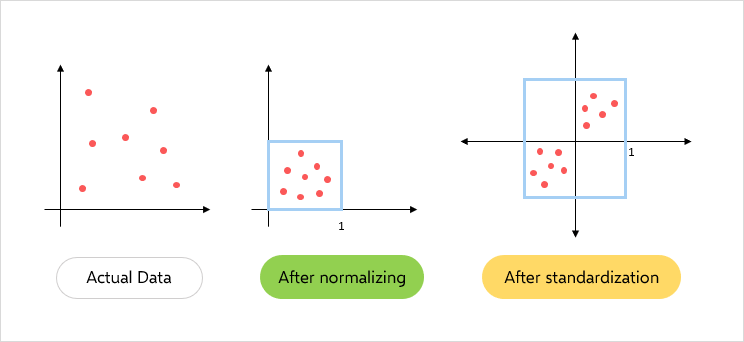

**Data Scaling and Data Leakage (Veri Ölçeklendirme ve Veri Sızıntısı)**

Veri ölçeklendirme işlemi sırasında veri sızıntısını (data leakage) önlemek kritik önem taşır. Bu nedenle, ölçeklendirme işlemlerini yaparken belirli adımlara dikkat etmek gerekir.

**Fit ve Transform İşlemleri**

- **Fit İşlemi**: Seçtiğimiz scaling algoritmasının dönüşüm formüllerinin oluşturulduğu adımdır. Bu işlem sırasında, eğitim verisi (**X_train**) üzerinde gezinilerek ortalama (**mean**) ve standart sapma (**std**) gibi değerler hesaplanır. Bu değerler daha sonra RAM'de saklanır ve dönüşüm işlemleri için kullanılır.

- **Transform İşlemi**: Fit işlemiyle elde edilen bilgiler kullanılarak veriler dönüştürülür. Hem eğitim verisi (**X_train**) hem de test verisi (**X_test**) bu bilgilerle dönüştürülür.

**Neden Sadece X_train Üzerinde Fit İşlemi Yapıyoruz?**

- **Veri Sızıntısı (Data Leakage)**: Tüm veri seti üzerinde fit işlemi yapılırsa, model test verisindeki bilgileri görmüş olur ve bu da veri sızıntısına yol açar. Bu, modelin gerçek performansını yanlış bir şekilde yüksek göstermesine neden olur.
- **Doğru Değerlerle Dönüşüm**: Fit işlemi sadece **X_train** üzerinde yapılır ve burada elde edilen ortalama ve standart sapma değerleri ile hem eğitim hem de test verileri dönüştürülür. Bu sayede, eğitim ve test verileri aynı ölçeklendirme ölçütlerine göre dönüştürülmüş olur ve veri sızıntısı önlenir.

**Uygulama Adımları**

1. **Fit İşlemi**: Seçilen scaling algoritmasını sadece **X_train** üzerinde uygularız.
   ```python
   scaler = StandardScaler()  # Örneğin, StandardScaler kullanıyoruz
   scaler.fit(X_train)
   ```

2. **Transform İşlemi**: Fit işlemi ile elde edilen parametreler kullanılarak hem **X_train** hem de **X_test** dönüştürülür.
   ```python
   X_train_scaled = scaler.transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   ```

Bu adımlar, modelin sadece eğitim verilerini tanımasını ve test verilerini önceden görmesini engelleyerek veri sızıntısını önler. Test verilerine, eğitim verileri ile elde edilen parametreler uygulanarak ölçeklendirme yapılır, böylece modelin performansı doğru bir şekilde değerlendirilir.

**Neden X_train Üzerinde Fit İşlemi Yapıyoruz?**

- **Büyük Veri Kapsamı**: X_train genellikle veri setinin büyük bir kısmını içerir ve bu yüzden verinin genel özelliklerini iyi bir şekilde yansıtır.
- **Z-Skoru Tutarlılığı**: X_train üzerinde yapılan fit işlemi ile elde edilen z-skorları, test verileri üzerinde de aynı dönüşüm ölçütlerini kullanmamızı sağlar. Bu, modelin eğitim sırasında gördüğü dağılım ile test sırasında gördüğü dağılımın uyumlu olmasını sağlar.

**Özet**

Veri sızıntısını önlemek ve modelin performansını doğru bir şekilde değerlendirmek için fit işlemi sadece eğitim verisi üzerinde yapılmalıdır. Daha sonra, elde edilen parametrelerle hem eğitim hem de test verileri dönüştürülmelidir. Bu, modelin test verilerini önceden görmesini engeller ve gerçekçi bir performans değerlendirmesi sağlar.

---

**Data Scaling and Data Leakage**

Preventing data leakage during data scaling is critically important. Therefore, specific steps must be followed carefully during the scaling process.

**Fit and Transform Processes**

- **Fit Process**: This is the step where the transformation formulas for the chosen scaling algorithm are generated. During this process, the mean and standard deviation values are calculated by iterating over the training data (**X_train**). These values are then stored in RAM and used for the transformation process.

- **Transform Process**: The data is transformed using the information obtained from the fit process. Both the training data (**X_train**) and the test data (**X_test**) are transformed using this information.

**Why Do We Only Perform the Fit Process on X_train?**

- **Data Leakage**: If the fit process is performed on the entire dataset, the model will have seen the test data, leading to data leakage. This would result in an unrealistically high model performance.
- **Correct Value Transformation**: The fit process is performed only on **X_train**, and the mean and standard deviation values obtained are used to transform both the training and test data. This ensures that the training and test data are transformed according to the same scaling criteria, preventing data leakage.

**Implementation Steps**

1. **Fit Process**: Apply the chosen scaling algorithm only on **X_train**.
   ```python
   scaler = StandardScaler()  # For example, using StandardScaler
   scaler.fit(X_train)
   ```

2. **Transform Process**: Use the parameters obtained from the fit process to transform both **X_train** and **X_test**.
   ```python
   X_train_scaled = scaler.transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   ```

These steps prevent the model from seeing the test data beforehand, thus preventing data leakage. The test data is scaled using the parameters obtained from the training data, ensuring accurate model performance evaluation.

**Why Do We Perform the Fit Process on X_train?**

- **Large Data Coverage**: **X_train** typically contains a large portion of the dataset, thus accurately reflecting the general characteristics of the data.
- **Z-Score Consistency**: The z-scores obtained from fitting on **X_train** allow us to use the same transformation criteria on the test data. This ensures consistency between the distributions seen during training and testing.

**Summary**

To prevent data leakage and accurately evaluate model performance, the fit process should only be performed on the training data. Then, both the training and test data should be transformed using the obtained parameters. This prevents the model from seeing the test data and ensures realistic performance evaluation.

## Note:Logoritmic Transformation


Logaritmik dönüşüm, makine öğreniminde veri analizi ve modelleme süreçlerinde sıkça kullanılan bir tekniktir. Verilerin daha iyi analiz edilmesi ve modellerin performansının artırılması amacıyla kullanılır. 

**Logaritmik Dönüşüm Nedir?**

Logaritmik dönüşüm, bir veri setindeki değerlerin logaritmasını alarak dönüştürülmesidir. 
Matematiksel olarak, eğer  x bir veri noktası ise, logaritmik dönüşüm y = log(x) olarak ifade edilir. 
*****Bu dönüşüm, verilerin dağılımını normalize etmek, çarpık veri setlerini düzeltmek ve varyansı azaltmak için kullanılır.

**Neden Logaritmik Dönüşüm Kullanılır?**

1. **Çarpıklığı Azaltma:** Özellikle pozitif çarpıklığa sahip veri setlerinde (uzun kuyruklu dağılımlar), logaritmik dönüşüm verilerin daha simetrik bir dağılıma sahip olmasını sağlar.
2. **Varyansı Azaltma:** Değerlerin geniş bir aralığa yayılmış olduğu veri setlerinde, logaritmik dönüşüm, değerlerin daha dar bir aralığa sıkışmasını sağlar ve varyansı azaltır.
3. **Doğrusallık Sağlama:** Bazı ilişkiler logaritmik ölçekte daha doğrusal olabilir. 
Örneğin, belirli bir ilişki y=β0+β1.log(x) formunda olabilir.
4. **Çok Büyük veya Çok Küçük Değerlerin Yönetimi:** Logaritmik dönüşüm, çok büyük veya çok küçük değerlerin etkisini azaltarak modellerin bu tür verilere daha dayanıklı olmasını sağlar.

**Nerede ve Ne Zaman Kullanılır?**

1. **Regresyon Analizi:** Özellikle bağımlı ve bağımsız değişkenler arasındaki ilişki doğrusal değilse, logaritmik dönüşüm kullanılabilir.
2. **Zaman Serisi Analizi:** Özellikle finansal veriler gibi zaman serilerinde, logaritmik dönüşüm getiri oranlarının analizinde yaygındır.
3. **Makine Öğrenimi Modelleri:** Doğrusal regresyon, lojistik regresyon gibi modellerde verilerin dağılımını iyileştirmek ve model performansını artırmak için kullanılır.
4. **Veri Görselleştirme:** Çarpık veri setlerini görselleştirirken, logaritmik dönüşüm daha anlamlı grafikler elde etmeye yardımcı olabilir.

**Örnek Kullanım**

Diyelim ki bir veri setinde bazı gelir değerleri var ve bu değerler pozitif çarpıklığa sahip (birçok küçük değer ve birkaç çok büyük değer). Bu durumda, bu gelir değerlerine logaritmik dönüşüm uygulayarak daha dengeli bir dağılım elde edebiliriz:

```python
import numpy as np
import pandas as pd

# Örnek gelir verileri
gelirler = pd.Series([1000, 2000, 5000, 10000, 50000, 100000])

# Logaritmik dönüşüm uygulama
log_gelirler = np.log(gelirler)

print(log_gelirler)
```

Bu dönüşüm sonucunda, gelir verileri daha simetrik bir dağılıma sahip olacaktır ve modelleme sürecinde daha iyi performans gösterebilir.

Logaritmik dönüşüm, verilerin özelliklerine ve analiz hedeflerine bağlı olarak dikkatlice uygulanmalıdır. 

**DIIKAT!! logaritması alınacak değerlerin pozitif olması gerektiğini unutmamak önemlidir >=1.**

Bu nedenle, verilerde sıfır veya negatif değerler varsa, dönüşümden önce bu değerler uygun şekilde işlenmelidir.

[Log_trans_video](https://www.youtube.com/watch?v=ClJX7qt6YAM)

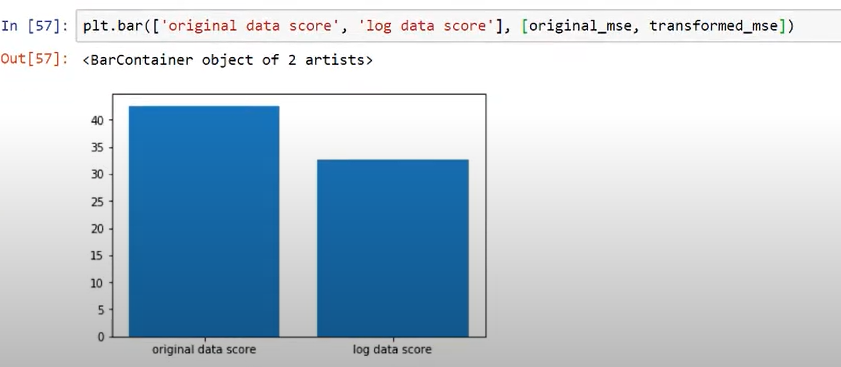

---

## Scale the Data

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [13]:
scaler = StandardScaler()

In [14]:
# Fit the Train Data with scaler;

scaler.fit(X_train)  # modeli sadece TRAIN datasi ile fit edebilir/egitebiliriz!! test datasini gormemeli!!
                     #scale.fit_transform(X_train)=> fit ve trans ayni anda yapilabiliriz

StandardScaler()

In [17]:
# Transform the Train Data with Scaler

X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [22]:
pd.DataFrame(X_train_scaled).agg(['mean','std']).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
pd.DataFrame(X_train_scaled).agg(['min','max']).round(2) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
min,-1.79,-1.59,-1.41,-1.18,-1.10,-0.95,-1.06,-0.90,-0.80,-0.93,-0.85,-0.72,-0.82,-0.69,-0.59,-0.85,-0.73,-0.62,-0.55,-0.79,-0.71,-0.60,-0.68,-0.55,-0.47,-0.68,-0.59,-0.49,-0.41,-0.73,-0.63,-0.54,-0.47,-0.41,-0.68,-0.61,-0.52,-0.58,-0.46,-0.40,-0.58,-0.48,-0.39,-0.34,-0.60,-0.53,-0.45,-0.36,-0.31,-0.64,-0.57,-0.5,-0.43,-0.37,-0.32
max,1.72,1.78,3.26,2.27,2.64,4.82,2.34,3.36,4.89,2.73,3.29,5.56,3.20,4.96,6.93,2.82,3.81,4.80,6.40,3.12,3.79,6.15,3.60,5.73,7.78,3.77,4.47,7.23,8.61,3.23,4.45,4.88,6.36,7.69,3.45,4.17,6.64,4.16,6.26,8.39,3.93,5.25,7.98,9.36,4.25,4.54,6.79,9.05,9.79,3.61,5.03,5.1,5.76,7.67,8.72


In [18]:
# Transform the Test Data with Scaler /# Test datasinda scale uzerinden transform edilir!!!

X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [21]:
pd.DataFrame(X_test_scaled).agg(['mean','std']).round(2) 

# scaler.fit(X_train) ==> seklinde yukarda fit islemi gerceklestirildi
# test datasini scale ile transfrom ettik fakat fit etmedigimiz icin train datasina gore mean ve sdt degerleri farkli gelecektir

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.18,-0.03,-0.09,-0.15,-0.15,-0.22,-0.02,-0.01,-0.04,-0.13,-0.12,-0.22,-0.09,-0.14,-0.18,-0.00,0.02,0.02,0.00,-0.11,-0.08,-0.22,-0.07,-0.15,-0.20,-0.05,-0.08,-0.12,-0.15,0.02,0.05,0.04,0.04,0.05,-0.10,-0.06,-0.22,-0.05,-0.15,-0.20,-0.04,-0.10,-0.15,-0.18,-0.02,-0.03,-0.08,-0.1,-0.11,0.04,0.08,0.05,0.05,0.08,0.11
std,1.05,1.02,1.05,1.01,1.05,0.76,1.06,1.07,1.13,0.98,1.05,0.65,1.06,0.84,0.61,1.09,1.11,1.15,1.38,0.96,1.03,0.57,1.07,0.72,0.46,1.09,0.94,0.68,0.55,1.12,1.15,1.13,1.39,1.74,0.94,1.01,0.51,1.07,0.63,0.38,1.12,0.82,0.52,0.33,1.14,1.04,0.76,0.6,0.57,1.16,1.19,1.11,1.31,1.75,2.16


In [23]:
pd.DataFrame(X_test_scaled).agg(['min','max']).round(2) 

# tarin ve test datasinda ki min-max degerleri farkli, haliyle mean ve sdt degerleri de farkli geldi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
min,-1.75,-1.49,-1.44,-1.18,-1.09,-0.95,-1.06,-0.89,-0.80,-0.93,-0.85,-0.72,-0.82,-0.69,-0.59,-0.85,-0.73,-0.62,-0.55,-0.79,-0.71,-0.60,-0.68,-0.55,-0.47,-0.68,-0.59,-0.49,-0.41,-0.73,-0.63,-0.54,-0.47,-0.41,-0.68,-0.61,-0.52,-0.58,-0.46,-0.40,-0.58,-0.48,-0.39,-0.34,-0.60,-0.53,-0.45,-0.36,-0.31,-0.64,-0.57,-0.50,-0.43,-0.37,-0.32
max,1.68,1.76,3.87,2.21,2.99,1.87,2.32,3.65,6.46,2.63,3.51,1.92,3.74,2.49,2.17,2.77,3.14,6.35,9.47,2.97,3.83,1.91,4.45,2.56,1.51,4.36,3.15,2.27,2.56,3.17,3.56,5.65,9.45,12.79,3.26,4.01,1.82,4.89,2.60,1.37,5.23,3.28,1.86,1.40,4.88,3.92,2.73,2.77,3.46,3.52,4.09,4.85,8.57,12.84,16.32


# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
# Linearregression modeli olusturup bu modeli scale edilmis TRAIN datasi ile egitelim;

lm.fit(X_train_scaled, y_train) # Y feature yani Target 1 tane oldugu icin scale edilmez, gerek yok direk kullanilir

LinearRegression()

In [28]:
y_pred = lm.predict(X_test_scaled)         # Gormedigi datadan Tahminleme: scale edilmis X_test datasi ile Y_pred olusturulur
y_train_pred = lm.predict(X_train_scaled)  # Gordugu datadan Tahminleme: X_train_scaled datasi ile de tahminleme yapip test ile karsilactiracagiz

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# rmse fonk yoktur, mse karekoku alinarak manuel hesapla

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }
    
    return pd.DataFrame(scores)

In [32]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
ls  # linear Scores

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


R2 degerleri arasinda cok ciddi fark var;

- Train datasinda model perfm cok iyi neredeyse 1 !!
- Test datasinda perfm kotu kendini ele verdi---> OVERFITTING
- Error metric lerinin 0 veya 0 a yakin olmasini isteriz

Bu sonuclari Bias-variance acisindan degerlendirelim;

- BIAS: Modelin egitildigi Train datasi uzerinden predictions olustururken yaptigi hata orani
- VARIANCE: Train datasi ile Test datasi arasindaki ERROR scorelari arasindaki FARKLILIK

Bu sonuclara bakildiginda;
- Train R2 ve test R2 arasinda Variance oldukca yuksek -> OVERFIT; istenmedik bir durum genelleme yapamaz --> optimum variance
- Train R2 score BIAS cok dusuk (hata orani cok dusuk mukemmel perfom 1 e yakin) ---> optimum Bias hedefle

- Train R2 score fazla overfit oldugu ve test ile degerleri birbirine yaklastirmak icin
- -> BIAS i arttirip hata ekleme yapilabilir 

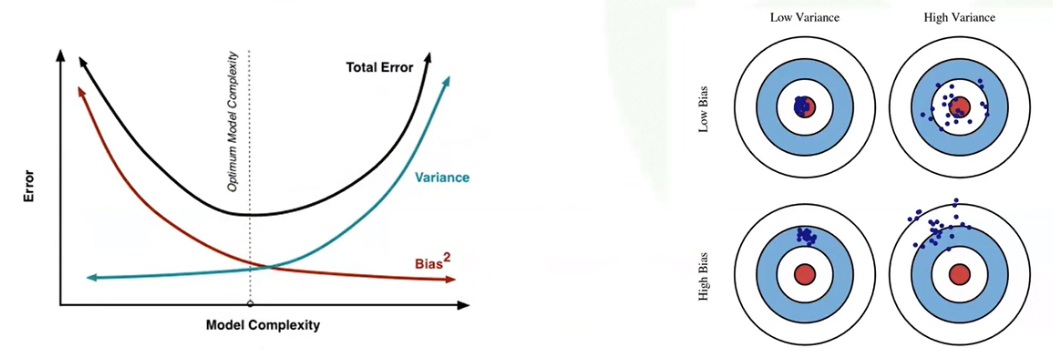

## Multicolineratiy

[Multicollinearity 1](https://www.youtube.com/watch?v=G1WX5GiFSWQ&ab_channel=DATAtab)

[Multicollinearity 2](https://www.youtube.com/watch?v=ekuD8JUdL6M&ab_channel=UnfoldDataScience)

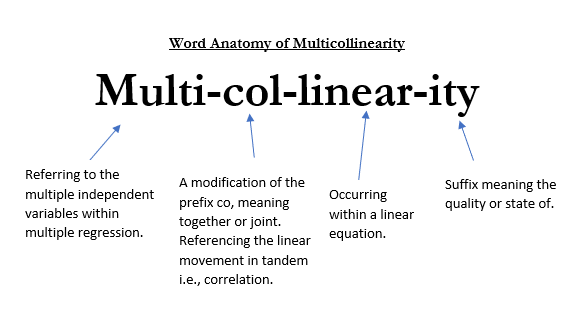

**Multikolineerlik (Multicollinearity)**

**Multikolineerlik**, bağımsız değişkenler (features) arasında yüksek derecede doğrusal ilişki olduğu durumlarda ortaya çıkan bir sorundur. Bu, regresyon analizinde ciddi problemler yaratabilir ve modelin güvenilirliğini azaltabilir. Multikolineerlik olduğunda, bağımsız değişkenlerin etkilerini ayırt etmek zorlaşır ve modelin tahmin performansı düşebilir.

**Nedenleri**:
- Veri setinde birbirine çok benzeyen bağımsız değişkenlerin bulunması.
- Çok sayıda bağımsız değişkenin modele dahil edilmesi.
- Zaman serisi verilerinde mevsimsel veya trend bileşenlerinin varlığı.

**Etkileri**:
- Regresyon katsayılarının güvenilmez hale gelmesi.
- Modelin genelleme yeteneğinin azalması.
- Standart hata terimlerinin büyümesi ve güven aralıklarının genişlemesi.

**Belirtileri**:
- Bağımsız değişkenler arasındaki yüksek korelasyon katsayıları.
- VIF (Variance Inflation Factor) değerlerinin yüksek olması (genellikle 10'un üzerinde).
- Modelin R-kare değerinin yüksek, ancak bireysel bağımsız değişkenlerin p-değerlerinin yüksek olması.

**Çözüm Yolları**:
1. **Değişkenlerin Çıkarılması**: Birbiriyle yüksek korelasyonlu değişkenlerden bazılarını modelden çıkarmak.
2. **Ana Bileşen Analizi (PCA)**: Veriyi daha az sayıda, bağımsız bileşenlere indirgemek.
3. **Ridge veya Lasso Regresyon**: Regresyon modellerinde cezalandırma (penalizasyon) yöntemleri kullanarak multikolineerliği azaltmak.

---

**Multicollinearity**

**Multicollinearity** occurs when independent variables (features) in a regression model are highly linearly related. This can create significant issues in regression analysis and reduce the reliability of the model. When multicollinearity is present, it becomes difficult to distinguish the effects of individual independent variables, and the predictive performance of the model may suffer.

**Causes**:
- Presence of highly similar independent variables in the dataset.
- Including a large number of independent variables in the model.
- Seasonal or trend components in time series data.

**Effects**:
- Regression coefficients become unreliable.
- The model's ability to generalize decreases.
- Standard errors increase, and confidence intervals widen.

**Indicators**:
- High correlation coefficients between independent variables.
- High VIF (Variance Inflation Factor) values (typically above 10).
- High R-squared value but high p-values for individual independent variables.

**Solutions**:
1. **Removing Variables**: Eliminate some of the highly correlated variables from the model.
2. **Principal Component Analysis (PCA)**: Reduce the data to fewer, independent components.
3. **Ridge or Lasso Regression**: Use penalization methods in regression models to reduce multicollinearity.

In [33]:
def color_custom(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

# Featurların kendi arasındaki corr. -0.90, +0.90 'dan büyük olan değerleri istediğimiz renkte göstermesi için
# kullanışlı bir fonksiyon oluşturuyoruz. Sizlerde internet üzerinden işinize yarayacak kodları kendi
# notebookunuza uyarlayarak kullanabilirsiniz

# Multicolineraty sorunu linear ve logisitc reg. gibi gradient descent tabanlı modellerde bir problem olarak karşımıza
# çıkar. Multicolineraty sorunu olan datalarda elde ettiğimiz scorelar farklı çıkmayacaktır. Ancak bir feature selection
# yapacaksak bu sorunu mutlaka gidermemiz gerekiyor. Regulirazition algoritmaları overfiting problemini giderdiği gibi
# multicolineraty sorununu da giderir.

In [34]:
pd.DataFrame(poly_features).corr().style.map(color_custom)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

## Cross Validate

[Cross Validation](https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer)

[Cross-Validate Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

[KFold in Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

[StratifiedKFold in Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

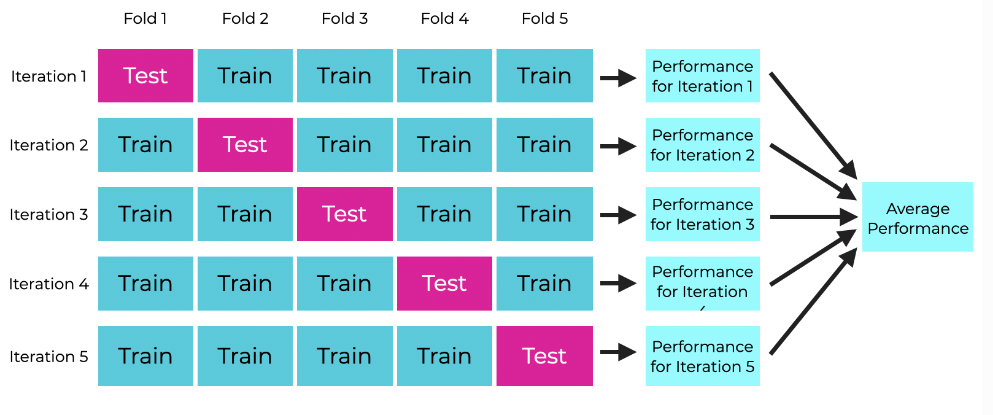

**Cross-validation (Çapraz Doğrulama)**

**Cross-validation (Çapraz Doğrulama)**, modelin genelleme yeteneğini ölçmek ve aşırı uyum (overfitting) yapmasını önlemek için kullanılan bir tekniktir. 

Bu yöntem, modelin gerçek dünya verileri üzerindeki performansını daha doğru bir şekilde tahmin etmemizi sağlar. 

En yaygın kullanılan cross-validation türü, **k-katlı çapraz doğrulama (k-fold cross validation)** olarak bilinir. İşte bu yöntemin adımları:

**Cross Validation Nasıl Çalışır?**

1. **Veri Setini Karıştırma**: Veri setini rasgele olarak karıştırırız.
2. **Veri Setini Bölme**: Veriyi K adet parçaya (fold) böleriz (örneğin, K=5 veya K=10).
3. **Test Parçasını Ayırma**: Bir parçayı (fold) test için ayırırız ve geri kalan K-1 parçayı eğitim (train) için kullanırız.
4. **Modeli Eğitme ve Test Etme**: K-1 parça ile modeli eğitip (fit), ayırdığımız tek parça ile test ederiz.
5. **Döngüyü Tekrarlama**: Başka bir parçayı test için alıp, döngüyü tekrarlarız.
6. **Farklı Train-Test Setleri**: Her iterasyonda farklı bir train-test datası kullanmış oluruz.
7. **Sonuçların Ortalaması**: K adet parçanın her biri için bu işlemi yaptığımızda elimizde K adet loss sonucu olur. Bu sonuçların ortalamasını alıp, ortalama loss değerimizi bulmuş oluruz.

---

**Cross-validation**

**Cross-validation** is a technique used to measure the generalization ability of a model and prevent overfitting. 

This method provides a more accurate estimate of the model's performance on real-world data. 

The most commonly used type of cross-validation is **k-fold cross validation**. Here are the steps of this method:

1. **Splitting the Dataset**: The dataset is randomly divided into "k" equal-sized subsets (folds). Typically, k = 5 or 10 is chosen, but this may vary depending on the problem and the size of the dataset.
2. **Training and Testing**: The model is trained on k-1 folds and tested on the remaining fold. This process is repeated for each fold, meaning each fold is used exactly once as the test set. This is why it's called "k-fold."
3. **Performance Measurement**: In each iteration, the model's performance (e.g., accuracy, recall, F1 score, etc.) is measured. These measurements are used to estimate the model's overall performance.
4. **Average Performance**: Finally, the performance metrics from all k iterations are averaged. This provides an estimate of the model's generalization performance.


**How Cross Validation Works**

1. **Shuffling the Dataset**: Randomly shuffle the dataset.
2. **Splitting the Dataset**: Divide the data into K folds (e.g., K=5 or K=10).
3. **Setting Aside the Test Fold**: Set aside one fold for testing and use the remaining K-1 folds for training.
4. **Training and Testing the Model**: Train the model with the K-1 folds (fit) and test it on the single fold set aside.
5. **Repeating the Process**: Repeat the process with a different fold as the test set each time.
6. **Different Train-Test Sets**: In each iteration, use different train-test data.
7. **Averaging the Results**: After performing this process for each of the K folds, we obtain K loss results. Average these results to find the mean loss value.

In [35]:
from sklearn.metrics import SCORERS

In [36]:
list(SCORERS.keys())

# neg_ negative kisatmasidir
# neg_score lar kucultulmeye (-) calisilan baskilanan Error scorelaridir, -> 0'a yakinsanan-indirgenen degerler
# R2 gibi perfomans scorelari ise 1'e cikarilmaya (+) calisilan degerlerdir

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'positive_likelihood_ratio',
 'neg_negative_likelihood_ratio',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',

In [37]:
from sklearn.model_selection import cross_validate, cross_val_score

# cross_validate, cross_val_score iki fonksiyon da CV işlemi için kullanılabilir. Ancak ;
# cross_val_score --> tek bir metric için score döndürürken, 
# cross_validate  --> birden fazla metric için score döndürebilir.
# Bu sebeple sıklıkla tercih edilir.

In [38]:
model = LinearRegression()
scores = cross_validate(model,      # birden fazla score girecegimiz icin cross_validate kullanildi
                        X_train_scaled,
                        y_train,
                        scoring=[   # birden fazla score list oalrak verildi
                            'r2',
                            'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error', 
                             ], 
                        cv=10,      # 10 katli folding yapip harmanlayarak cross vall yapar
                        return_train_score=True)

In [39]:
scores

{'fit_time': array([0.05534053, 0.00300574, 0.00514054, 0.00421929, 0.00356865,
        0.00298762, 0.00304961, 0.00260782, 0.00200081, 0.00200105]),
 'score_time': array([0.0081737 , 0.00102925, 0.00330329, 0.00202823, 0.0020504 ,
        0.00248742, 0.00196505, 0.00197887, 0.00152135, 0.00100017]),
 'test_r2': array([-0.28073372,  0.99301892,  0.9839342 ,  0.82527211,  0.99118105,
         0.96901174,  0.99288486,  0.99012982,  0.96550843,  0.9901235 ]),
 'train_r2': array([0.99802773, 0.99775353, 0.99795931, 0.99767279, 0.99768399,
        0.99791718, 0.99783495, 0.99760232, 0.99795114, 0.99756363]),
 'test_neg_mean_absolute_error': array([-1.99443016, -0.3770662 , -0.39231189, -0.97976652, -0.32225268,
        -0.48449274, -0.32795501, -0.44701511, -0.46502363, -0.32443256]),
 'train_neg_mean_absolute_error': array([-0.17088283, -0.18235186, -0.17584898, -0.18573603, -0.18615147,
        -0.17426497, -0.18087681, -0.18198699, -0.17546304, -0.19490624]),
 'test_neg_mean_squared_erro

In [41]:
pd.DataFrame(scores, index=range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.055341,0.008174,-0.280734,0.998028,-1.994430,-0.170883,-31.328119,-0.051993,-5.597153,-0.228021
2,0.003006,0.001029,0.993019,0.997754,-0.377066,-0.182352,-0.250648,-0.056709,-0.500647,-0.238136
3,0.005141,0.003303,0.983934,0.997959,-0.392312,-0.175849,-0.306241,-0.055228,-0.553391,-0.235007
4,0.004219,0.002028,0.825272,0.997673,-0.979767,-0.185736,-4.402358,-0.061429,-2.098180,-0.247848
5,0.003569,0.002050,0.991181,0.997684,-0.322253,-0.186151,-0.166869,-0.060162,-0.408496,-0.245279
6,0.002988,0.002487,0.969012,0.997917,-0.484493,-0.174265,-0.976815,-0.053603,-0.988339,-0.231524
7,0.003050,0.001965,0.992885,0.997835,-0.327955,-0.180877,-0.144808,-0.058398,-0.380536,-0.241657
8,0.002608,0.001979,0.990130,0.997602,-0.447015,-0.181987,-0.332058,-0.060747,-0.576244,-0.246468
9,0.002001,0.001521,0.965508,0.997951,-0.465024,-0.175463,-0.528863,-0.055042,-0.727230,-0.234610
10,0.002001,0.001000,0.990123,0.997564,-0.324433,-0.194906,-0.197801,-0.065733,-0.444748,-0.256384


In [42]:
scores = pd.DataFrame(scores, index=range(1,11)) #0 dan başlatmasın diye 1 verdim indexe
scores.iloc[:, 2:].mean()  # 2.index featuredna itibaren tumunu aldik

# train seti içerisinden elde ettiğimiz yeni train ve validation setlerinden elde ettiğimiz metriclerin ortalamasını
# alıyoruz.

test_r2                              0.842033
train_r2                             0.997797
test_neg_mean_absolute_error        -0.611475
train_neg_mean_absolute_error       -0.180847
test_neg_mean_squared_error         -3.863458
train_neg_mean_squared_error        -0.057904
test_neg_root_mean_squared_error    -1.227496
train_neg_root_mean_squared_error   -0.240493
dtype: float64

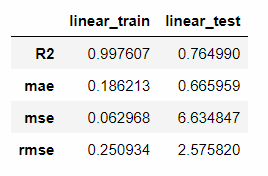

In [43]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [46]:
lm_df = pd.DataFrame(lm.coef_, columns= ['lm_coeff'])
lm_df.head()

,lm_coeff
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695


# Regularization

[Regularization 1](https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer)

[Regularization 2](https://www.youtube.com/watch?v=1dKRdX9bfIo&ab_channel=StatQuestwithJoshStarmer)

[Regularization 3](https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer)

[Regularization 4](https://www.youtube.com/watch?v=VqKq78PVO9g&ab_channel=codebasics)

[Ridge Regression in Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

[Lasso Regression in Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

[ElasticNet Regression in Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

**Regularization: Overfitting'in Önlenmesi**

Lineer Modeller en çok kullanılan Machine Learning algoritmalarının başında gelir. Ancak, çok ciddi bir eksiği vardır: **Overfitting** yapmaya çok yatkındırlar.

**Lineer Modellerin Temeli**

En basit hali ile 2 boyutlu düzlemde, veri noktalarına en iyi uyan doğru (ya da eğri) parçasını bulmaya çalışır. Formülü son derece basittir:

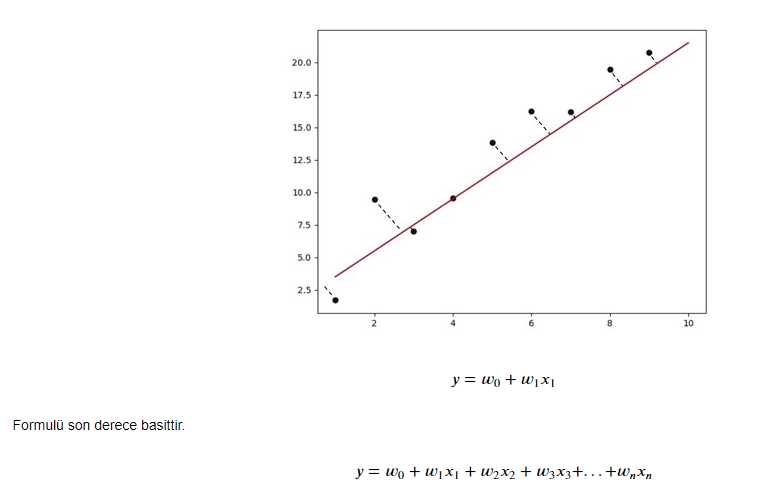

Ancak, değişken sayısı arttıkça katsayılar yani \( w \) değerleri büyümeye (artı ve eksi yönde) başlar. Yeterince büyük \( w \) değerleri ile hemen hemen her şeyi tahmin edebilirsiniz. İşte bu da tam olarak **Overfitting**'in başladığı yerdir.

**Overfitting Nedir?**

Overfitting, modelin eğitim verisini aşırı öğrenmesi ve bu nedenle test verilerine genelleme yapamaması durumudur. 

Model, eğitim verisindeki rastgele varyasyonları ve gürültüyü öğrenir ve bu da modelin yeni verilere karşı zayıf performans göstermesine neden olur.

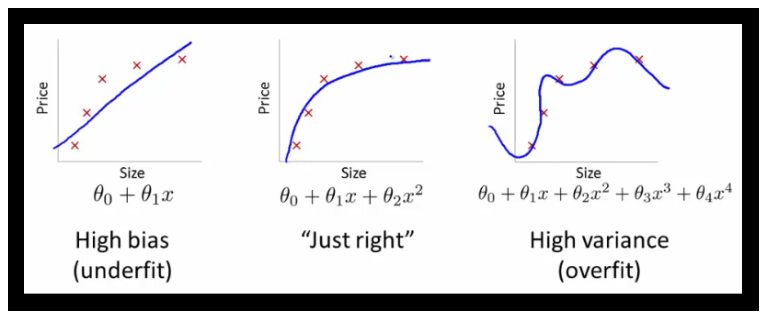

**Regularization ile Overfitting'in Önlenmesi**

Bu problem, **Regularization** ile çözülebilir. Normalde model, hatayı en aza indirmek için katsayıları pozitif ve negatif yönde büyütüp en az hata yakalamaya çalışır. Dolayısıyla katsayılar - ve + yönde büyüyecektir. Ancak, Regularization modelin katsayıları büyütmesini cezalandırır ve böylece model artık istese bile katsayıları büyütemez.

**Yeni Loss Fonksiyonumuz**

Regularization ile beraber yeni loss fonksiyonumuz şu şekildedir:

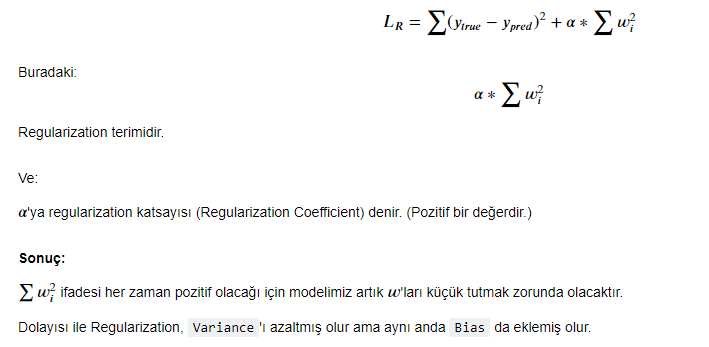

**Regularization Nasıl Uygulanır?**

Yukarıda gördüğünüz \( w \) değerleri aslında modelin içinde set edilen parametrelerdir.

Ancak \(\alpha\) ifadesi bir hyperparameter'dir ve onu set ederek Regularization şiddetini biz kontrol ederiz. 

**Regularization: Preventing Overfitting**

Linear Models (Linear Regression, Support Vector Machine, etc.) are among the most commonly used Machine Learning algorithms. However, they have a significant drawback: they are very prone to **overfitting**.

**The Basics of Linear Models**

In the simplest form, as seen in a 2D plane, they try to find the best fitting line (or curve) to the data points. The formula is very straightforward:

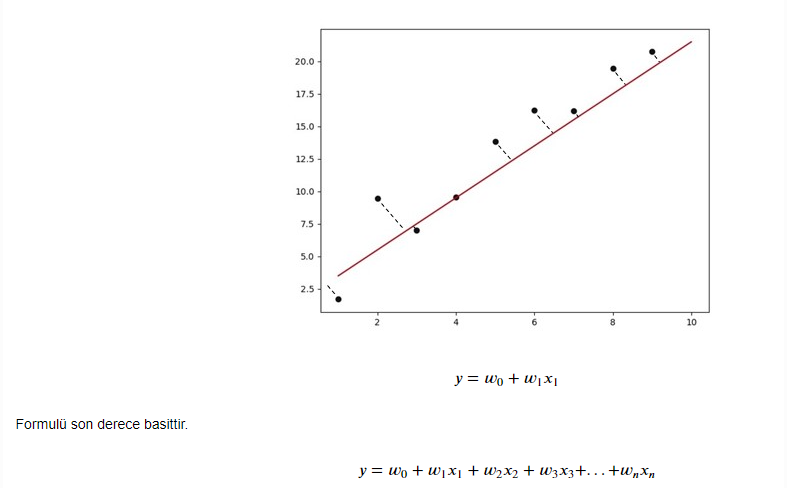

Ancak, değişken sayısı arttıkça katsayılar yani \( w \) değerleri büyümeye (artı ve eksi yönde) başlar. Yeterince büyük \( w \) değerleri ile hemen hemen her şeyi tahmin edebilirsiniz. İşte bu da tam olarak **Overfitting**'in başladığı yerdir.

However, as the number of variables increases, the coefficients, i.e., \( w \) values, begin to grow (in both positive and negative directions). With sufficiently large \( w \) values, you can predict almost anything. This is exactly where **overfitting** starts.

**What is Overfitting?**

Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations in the data, which leads to poor performance on new, unseen data. The model becomes overly complex and fails to generalize to new data.

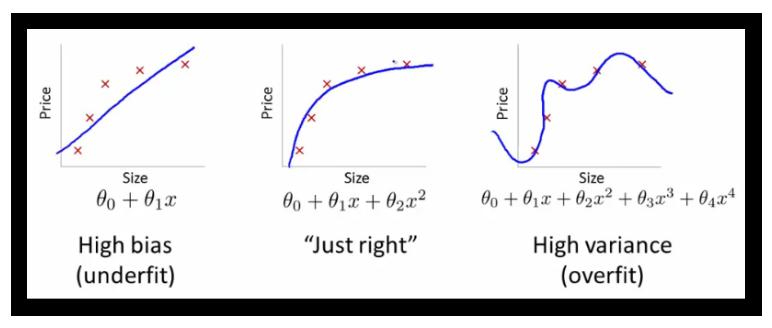

**Preventing Overfitting with Regularization**

This problem can be solved with **Regularization**. While performing OLS (Ordinary Least Squares), the model tries to minimize the error by increasing the coefficients in both positive and negative directions. Regularization penalizes the model for increasing the coefficients, thereby preventing the model from making them too large.

**Our New Loss Function with Regularization**

With Regularization, our new loss function becomes:

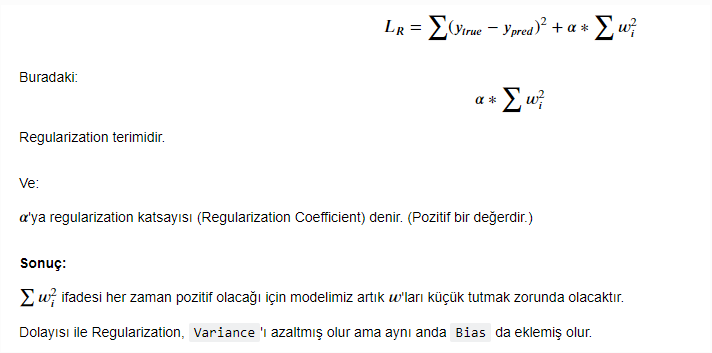

**How to Apply Regularization?**

The \( w \) values mentioned above are actually parameters set within the model. However, \(\alpha\) is a hyperparameter, and we control the intensity of Regularization by setting it.

Makine öğrenmesinde, regularization (düzenlileştirme) bir modelin aşırı uydurma (overfitting) olmasını önlemek için kullanılan bir tekniktir.

Overfitting, bir modelin eğitim verilerini "aşırı öğrenmesi" ve bu nedenle test verilerine genelleme yapamaması durumudur.

Regularization, rastgele varyasyonları öğrenmesini engeller ve bu sayede modelin genelleme yeteneğini artırır.

En yaygın kullanılan Regularization teknikleri L1 (Lasso) ve L2 (Ridge) olup, her ikisi de ağırlıkların büyüklüğünü sınırlar ancak farklı şekillerde yaparlar.

L1 Regularization (Lasso): Bu teknik, ağırlıkların mutlak değerlerinin toplamını kayıp fonksiyonuna ekler. Bu, bazı ağırlıkları tamamen sıfıra indirger ve bu nedenle bir özellik seçimi etkisi yaratır.

L2 Regularization (Ridge): Bu teknik, ağırlıkların karelerinin toplamını kayıp fonksiyonuna ekler. Bu, ağırlıkları sınırlar ancak genellikle tamamen sıfıra indirgemez. Bu nedenle, tüm özellikler genellikle modelde kalır, ancak daha az ağırlık alır.

## Ridge Regression

**Neden-Ne Zaman Ridge-Lasso Kullanırım**
                                          
Ridge ve Lasso regresyonları, doğrusal regresyonun regularizasyon versiyonlarıdır. Bu regularizasyon, modelin overfitting e karşı daha dayanıklı olmasını sağlar ve bazen modelin genel performansını artırabilir. 

1. **Overfitting i Önleme**:

   - **Ridge (L2 Regülarizasyon)**: 
   
       - Modelin katsayılarını küçültmek için katsayıların karelerinin toplamını ceza olarak ekler. 
       
       - Bu, modelin karmaşıklığını azaltarak overfitting i önler.
   
       - Ridge Regression'a L2 regularization denmesenin nedeni katsayıların karesini (2) almasıdır.
   
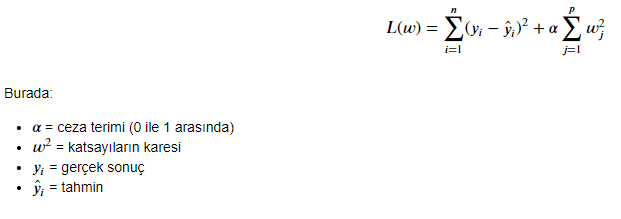
   
   - **Lasso (L1 Regülarizasyon)**: 
   
       - Modelin katsayılarını sıfıra doğru sıkıştırmak için katsayıların mutlak değerlerinin toplamını ceza olarak ekler. 
       
       - Bu, bazı katsayıları tamamen sıfıra getirerek özellik seçimi yapar ve modelin karmaşıklığını azaltır.
       
       - Lasso'ya L1 regularization denmesenin nedeni katsayıların birinci kuvvetini (1) almasıdır.
       
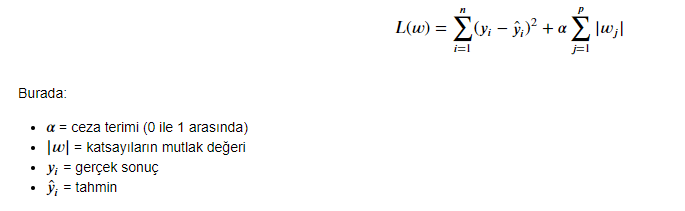

   - **Elastic Net**: 
   
       - L1 ve L2 Regularization'ın bileşimidir 
       
 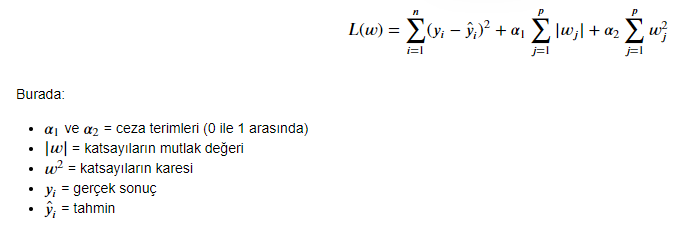     
       

2. **Feature Selection**:
   - Lasso regresyonu, bazı katsayıları tamamen sıfıra indirerek etkisiz feature ları modelden çıkarabilir. Bu, feature selection olarak da adlandırılır ve yüksek boyutlu veri setlerinde çok faydalıdır.

3. **Multicollinarity**:
   - Eğer bir veri setindeki özellikler arasında yüksek korelasyon (multicollinarity) varsa, bu, linear regresyonun katsayılarını istikrarsızlaştırabilir. Ridge ve Lasso, bu tür durumlarda katsayıları stabilize edebilir.

4. **Model Yorumlanabilirliği**:
   - Lasso, yalnızca en önemli feature ları modele dahil ederek modelin yorumlanabilirliğini artırabilir. Ridge de katsayıları küçülterek, modeldeki feature ların etkisini daha anlaşılır kılar.

Sonuç olarak, Ridge ve Lasso regresyonları, linear regresyonun bazı kısıtlamalarını aşmamıza ve daha genelleştirilebilir, daha istikrarlı modeller oluşturmamıza yardımcı olabilir. Hangi yöntemin kullanılacağı, veri setine, problem tanımına ve özellikle modelin ne kadar esnek olmasını istediğinize bağlıdır. Bu iki Regülarizasyon tekniği arasında bir denge bulmak için **Elastic Net** gibi yaklaşımlar da mevcuttur.

**When and Why to Use Ridge and Lasso Regression**

Ridge and Lasso regressions are regularization versions of linear regression. This regularization makes the model more robust against overfitting and can sometimes improve the model's overall performance.

1. **Preventing Overfitting**:

   - **Ridge (L2 Regularization)**:
   
       - Adds the sum of the squared coefficients as a penalty to shrink the model's coefficients.
       
       - This reduces the complexity of the model and helps prevent overfitting.
   
       - It is called L2 regularization because it takes the square (2) of the coefficients.
   
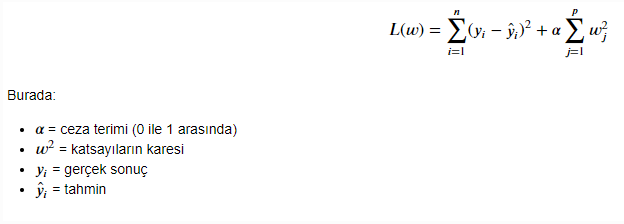

   - **Lasso (L1 Regularization)**:
   
       - Adds the sum of the absolute values of the coefficients as a penalty to shrink the coefficients toward zero.
       
       - This can lead to some coefficients being exactly zero, effectively performing feature selection and reducing model complexity.
       
       - It is called L1 regularization because it takes the first power (1) of the coefficients.
   
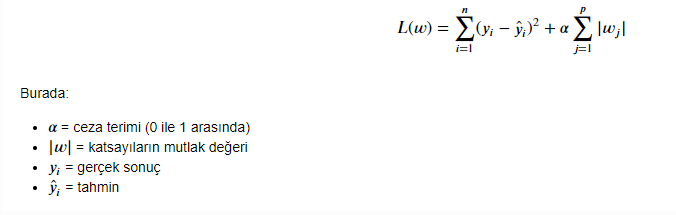

   - **Elastic Net**:
   
       - Combines L1 and L2 regularization.
   
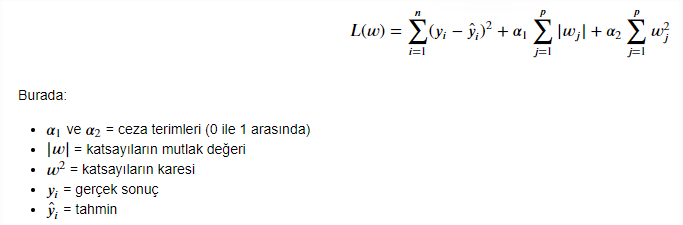       

2. **Feature Selection**:
   - Lasso regression can drive some coefficients to exactly zero, effectively removing non-informative features from the model. This is also known as feature selection and is very useful in high-dimensional datasets.

3. **Multicollinearity**:
   - If there is high correlation (multicollinearity) among features in a dataset, this can destabilize the coefficients of linear regression. Ridge and Lasso can stabilize the coefficients in such situations.

4. **Model Interpretability**:
   - Lasso can enhance model interpretability by including only the most significant features. Ridge also makes the impact of features more understandable by shrinking the coefficients.

In conclusion, **Ridge and Lasso regressions** help overcome some limitations of linear regression, allowing us to build more generalizable and stable models. The choice between the two methods depends on the dataset, problem definition, and the desired flexibility of the model. Approaches like **Elastic Net** can be used to balance the benefits of both regularization techniques.

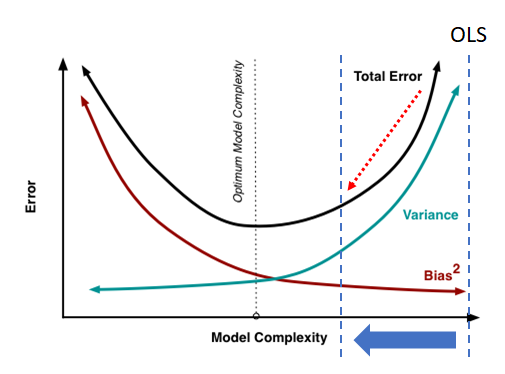

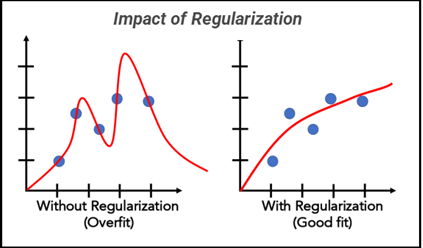

In [47]:
from sklearn.linear_model import Ridge

In [48]:
ridge_model= Ridge(alpha=1) # Default alpha =1

In [49]:
ridge_model.fit(X_train_scaled, y_train)

# scale edilen X_train ve y_train fit ederiz
# ridge reg.algortimasında eğitim yapacağımız data mutlaka scale edilmiş olmalıdır.
# Bu işlem tüm featurlara model tarafından eşit ağırlıklandırma yaparak hem multicolinarity sorununu gideriyor
# hem de featureları önemli önemsiz olarak gruplandırabiliyor

Ridge(alpha=1)

In [51]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [53]:
# Ridge model metrics scores;

rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [54]:
# Linear Scores ile Ridge Scores Comparing;

pd.concat([ls, rs], axis=1)  

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997607,0.764990,0.988677,0.982511
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
rmse,0.250934,2.575820,0.545866,0.702669


yukaridaki sonuclara gore;

- rmse scorelari yukseldi, Hata eklendigini gosterir
- train ve test R2 score lari yaklasti

Yine de yeterli degil, Cross validation yapilacak

### For Ridge Regression CV with alpha : 1 

In [58]:
model_ridge = Ridge(alpha=1)
scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=[
                            'r2',
                            'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error',
                        ], cv=10, return_train_score=True)

In [59]:
pd.DataFrame(scores, index=range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.003051,0.004464,0.989194,0.987941,-0.430312,-0.344561,-0.264330,-0.317913,-0.514130,-0.563838
2,0.000996,0.002992,0.988294,0.988010,-0.399467,-0.332755,-0.420281,-0.302668,-0.648291,-0.550152
3,0.001927,0.003030,0.980399,0.988578,-0.419370,-0.351819,-0.373627,-0.309121,-0.611250,-0.555987
4,0.002154,0.003566,0.965854,0.988579,-0.656779,-0.330212,-0.860334,-0.301454,-0.927542,-0.549048
5,0.000999,0.001000,0.991450,0.987655,-0.343240,-0.349061,-0.161785,-0.320673,-0.402224,-0.566280
6,0.001586,0.001081,0.919753,0.992534,-0.723583,-0.317275,-2.529543,-0.192141,-1.590454,-0.438339
7,0.001064,0.001000,0.993011,0.988278,-0.290596,-0.344936,-0.142237,-0.316165,-0.377144,-0.562285
8,0.001007,0.001964,0.990300,0.987434,-0.434471,-0.334070,-0.326317,-0.318372,-0.571241,-0.564245
9,0.001028,0.001012,0.975828,0.989074,-0.443009,-0.345216,-0.370636,-0.293513,-0.608799,-0.541768
10,0.000978,0.002026,0.991642,0.987902,-0.269488,-0.349557,-0.167392,-0.326395,-0.409136,-0.571310


In [60]:
#Cross validated Ridge model sonuclari

scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                              0.978573
train_r2                             0.988599
test_neg_mean_absolute_error        -0.441032
train_neg_mean_absolute_error       -0.339946
test_neg_mean_squared_error         -0.561648
train_neg_mean_squared_error        -0.299841
test_neg_root_mean_squared_error    -0.666021
train_neg_root_mean_squared_error   -0.546325
dtype: float64

In [61]:
#Ridge model score sonuclarini tekrar call edelim

train_val(y_train, y_train_pred, y_test, y_pred, "ridge")  # bir onceki model ile sonuclari karsilastiralim

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [62]:
rm_df= pd.DataFrame(ridge_model.coef_, columns=['ridge_coef_1'])

In [63]:
# Linear model ile Ridge model katsayilarini karsilastiralim;

pd.concat([lm_df, rm_df], axis=1)

,lm_coeff,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


### Choosing best alpha value with GridSearchCV for Ridge

**GridSearchCV'nin Amacı**

- **Hiperparametre Optimizasyonu**: GridSearchCV, makine öğrenimi modelinin performansını en üst düzeye çıkarmak için en iyi hiperparametre kombinasyonlarını bulmak amacıyla kullanılır.

- **Kapsamlı Arama**: Birden fazla hiperparametre olduğunda, GridSearchCV tüm olası hiperparametre kombinasyonlarını deneyerek en iyi sonucu veren kombinasyonu bulur.

**GridSearchCV'nin İşleyişi**

1. **Parametre Gridi Tanımlama**: Kullanıcı tarafından belirlenen çeşitli hiperparametreler ve bu parametreler için denenecek değerlerin bir listesi (parametre gridi) oluşturulur.

2. **Arama ve Değerlendirme**: GridSearchCV, bu parametre gridindeki her bir kombinasyonu deneyerek modeli eğitir ve her bir kombinasyon için çapraz doğrulama (cross validation) kullanarak modelin performansını değerlendirir.

3. **En İyi Kombinasyonu Bulma**: Tüm kombinasyonlar arasından, modelin performansını en üst düzeye çıkaran hiperparametre kombinasyonu seçilir.

4. **Son Modelin Eğitilmesi**: Seçilen en iyi hiperparametrelerle son model eğitilir. Bu nedenle, GridSearchCV'nin sonucunda model, bu en iyi hiperparametreler ile eğitilmiş olur.

**Özet**

GridSearchCV, bir makine öğrenimi modelinin performansını en üst düzeye çıkarmak için kullanılan bir hiperparametre optimizasyon aracıdır. Tüm olası hiperparametre kombinasyonlarını sistematik bir şekilde deneyerek en iyi sonucu veren kombinasyonu belirler ve son modeli bu kombinasyonla eğitir. Bu süreç, modelin daha etkili ve doğru tahminler yapmasını sağlamak için kritik önem taşır.


**Parameter vs Hyperparameter**

**Parameter**

- Model parametreleri olarak da bilinir
- Eğitim süreci sırasında veriden öğrenilen değerlerdir.
- Genellikle kullanıcı tarafından manuel olarak ayarlanmazlar.
- **Örnekler**:
    - **Lineer Regresyon**: Ağırlıklar $\beta_0$ ve $\beta_1$
    - **Yapay Sinir Ağları**: Ağırlıklar $w$
    - **Karar Ağaçları**: Bölme noktaları

**Hyperparameter:**

- Hiperparametreler, eğitim süreci başlamadan önce ayarlanan ve eğitim sürecini kontrol eden dış yapılandırma parametreleridir.
- Veriden öğrenilmezler; bunun yerine, manuel olarak veya otomatik hiperparametre optimizasyon teknikleriyle ayarlanırlar.
- Kullanıcı tarafından manuel olarak ayarlanır veya grid search gibi tekniklerle optimize edilirler.
- **Örnekler**:
    - **KNN**: K değeri
    - **Regularizasyon**: C katsayısı
    
**GridSearchCV Hyperparameters**

[GridSearchCV Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

```python
class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
    
---

**Purpose of GridSearchCV**

- **Hyperparameter Optimization**: GridSearchCV is used to find the best hyperparameter combinations to maximize the performance of a machine learning model.
- **Exhaustive Search**: When there are multiple hyperparameters, GridSearchCV tries all possible combinations of hyperparameters to find the one that gives the best result.

**How GridSearchCV Works**

1. **Defining the Parameter Grid**: The user defines various hyperparameters and a list of values to be tested for each parameter (parameter grid).
2. **Search and Evaluation**: GridSearchCV trains the model using each combination in the parameter grid and evaluates the model's performance using cross-validation for each combination.
3. **Finding the Best Combination**: From all the combinations, the one that maximizes the model's performance is selected.
4. **Training the Final Model**: The final model is trained with the selected best hyperparameters. As a result, the model obtained from GridSearchCV is trained with these optimal hyperparameters.

**Summary**

GridSearchCV is a hyperparameter optimization tool used to maximize the performance of a machine learning model. By systematically trying all possible hyperparameter combinations, it identifies the best combination and trains the final model with it. This process is critical to ensuring that the model makes more effective and accurate predictions.

**Parameter vs. Hyperparameter**

**Parameter**

- Also known as model parameters.
- Values learned from the data during the training process.
- Typically not manually set by the user.
- **Examples**:
    - **Linear Regression**: Weights $\beta_0$ and $\beta_1$
    - **Artificial Neural Networks**: Weights $w$
    - **Decision Trees**: Split points

**Hyperparameter**

- Hyperparameters are external configuration parameters set before the training process that control the training process itself.
- Not learned from the data; instead, they are manually set or optimized through automated hyperparameter optimization techniques.
- Manually set by the user or optimized using techniques such as grid search.
- **Examples**:
    - **KNN**: The value of K
    - **Regularization**: The value of C

**Ridge Regresyonun Hiperparametreleri:**

[Ridge Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

```python
class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)


1. **fit_intercept (True/False)**:
   - Eğer True ise, model y-eksenini kesme terimi (intercept) hesaplamak için uyarlanır.
   - Eğer False ise, y-eksenini kesme terimi kullanılmaz ve model verinin merkezi olduğunu varsayar.

2. **normalize (True/False/'deprecated')**:
   - Eğer True ise, regresyon yapmadan önce bağımsız değişkenler normalize edilir (ortalama 0 ve varyans 1 olacak şekilde).
   - Bu parametre, scikit-learn 0.24 ve sonraki sürümlerde "deprecated" olarak işaretlenmiştir. Veriyi normalleştirmek için StandardScaler kullanılması önerilir.

3. **copy_X (True/False)**:
   - Eğer True ise, bağımsız değişkenlerin kopyası oluşturulur ve asıl veri değiştirilmez.
   - Eğer False ise, fonksiyon orijinal veri üzerinde işlem yapabilir.

4. **max_iter (int ya da None)**:
   - Solver'ın (çözücünün) iterasyon için yapabileceği maksimum adımdır. 
   - Bu parametre belirli solver'lar için geçerlidir, örneğin 'sag' ve 'saga'.

5. **tol (float)**:
   - Optimizasyonun durma kriteridir. Daha küçük bir değer, daha hassas bir çözüm sağlar.

6. **solver ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga')**:
   - Ridge regresyonu için kullanılacak çözücüyü belirtir.
   - 'auto' seçeneği, verilere bağlı olarak en uygun çözücüyü otomatik olarak seçer.

7. **positive (True/False)**:
   - Eğer True ise, modelin katsayılarının pozitif olması zorlanır.

8. **random_state (int, RandomState instance ya da None)**:
   - Eğer belirli bir tam sayı (int) seçilirse, bu değer rastgeleliğin başlangıç değerini (seed) belirler. Bu sayede, farklı çalıştırmalarda aynı sonuçları elde etmek mümkündür.
   - Eğer None seçilirse, her çalıştırmada farklı rastgele sayılar üretilir.

---

**Hyperparameters of Ridge Regression:**

1. **fit_intercept (True/False)**:
   - If True, the model is fit with an intercept term.
   - If False, no intercept term is used, and the model assumes the data is centered.

2. **normalize (True/False/'deprecated')**:
   - If True, the independent variables are normalized (mean 0 and variance 1) before regression.
   - This parameter has been deprecated in versions of scikit-learn 0.24 and later. It is recommended to use StandardScaler to normalize the data before fitting the model.

3. **copy_X (True/False)**:
   - If True, a copy of the independent variables is made, leaving the original data unchanged.
   - If False, the function can operate on the original data.

4. **max_iter (int or None)**:
   - The maximum number of iterations the solver can perform.
   - This parameter is relevant for certain solvers like 'sag' and 'saga'.

5. **tol (float)**:
   - The tolerance for the optimization to decide when to stop. A smaller value will lead to a more precise solution.

6. **solver ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga')**:
   - Specifies the solver to be used for Ridge regression.
   - The 'auto' option automatically selects the best solver based on the data.

7. **positive (True/False)**:
   - If True, forces the coefficients to be positive.

8. **random_state (int, RandomState instance, or None)**:
   - If an integer is chosen, it sets the seed for random number generation, ensuring reproducible results.
   - If None, different random numbers are generated each time the function is run.

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
alpha_space = np.linspace(0.01, 1, 100) # 0.01 ile 1 arasinda 100 adet esit aralikli deger olusturur
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [66]:
ridge_model = Ridge()

In [68]:
param_grid = {'alpha' :alpha_space}

In [70]:
grid_ridge = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          verbose=3,
                          return_train_score=True)


# ridge ML modelinin scorlarının hangi metrice göre scorlarının iyileştirilmesini istiyorsak scoring karşısına ilgili
# metricimizi yazıyoruz. Tek bir metrci yazabiliriz. Default degeri R2_scorudur.
# GridsearcCV istediğimiz metrici maximize edecek şekilde hyperparameter uzayındaki tüm değerler için ayrı ayrı
# datanın farklı bölgelerinden scorlar alır (cv'de belirttiğimiz sayıya göre) ve bunların ortalamasını hesaplar.
# Ortalaması en yüksek olan hyperparameter değer/değerlerini döndürür.
# default cv sayısı 5'dir.
# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [71]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END .alpha=0.01;, score=(train=-0.366, test=-0.483) total time=   0.0s
[CV 2/10] END .alpha=0.01;, score=(train=-0.345, test=-0.573) total time=   0.0s
[CV 3/10] END .alpha=0.01;, score=(train=-0.358, test=-0.663) total time=   0.0s
[CV 4/10] END .alpha=0.01;, score=(train=-0.368, test=-0.570) total time=   0.0s
[CV 5/10] END .alpha=0.01;, score=(train=-0.366, test=-0.378) total time=   0.0s
[CV 6/10] END .alpha=0.01;, score=(train=-0.274, test=-1.262) total time=   0.0s
[CV 7/10] END .alpha=0.01;, score=(train=-0.367, test=-0.331) total time=   0.0s
[CV 8/10] END .alpha=0.01;, score=(train=-0.368, test=-0.325) total time=   0.0s
[CV 9/10] END .alpha=0.01;, score=(train=-0.333, test=-0.735) total time=   0.0s
[CV 10/10] END alpha=0.01;, score=(train=-0.371, test=-0.545) total time=   0.0s
[CV 1/10] END .alpha=0.02;, score=(train=-0.388, test=-0.460) total time=   0.0s
[CV 2/10] END .alpha=0.02;, score=(train=-0.

[CV 10/10] END alpha=0.13;, score=(train=-0.465, test=-0.238) total time=   0.0s
[CV 1/10] END .alpha=0.14;, score=(train=-0.458, test=-0.420) total time=   0.0s
[CV 2/10] END .alpha=0.14;, score=(train=-0.438, test=-0.595) total time=   0.0s
[CV 3/10] END .alpha=0.14;, score=(train=-0.448, test=-0.659) total time=   0.0s
[CV 4/10] END .alpha=0.14;, score=(train=-0.452, test=-1.290) total time=   0.0s
[CV 5/10] END .alpha=0.14;, score=(train=-0.461, test=-0.372) total time=   0.0s
[CV 6/10] END .alpha=0.14;, score=(train=-0.341, test=-1.343) total time=   0.0s
[CV 7/10] END .alpha=0.14;, score=(train=-0.455, test=-0.402) total time=   0.0s
[CV 8/10] END .alpha=0.14;, score=(train=-0.460, test=-0.421) total time=   0.0s
[CV 9/10] END .alpha=0.14;, score=(train=-0.424, test=-0.705) total time=   0.0s
[CV 10/10] END alpha=0.14;, score=(train=-0.468, test=-0.241) total time=   0.0s
[CV 1/10] END alpha=0.15000000000000002;, score=(train=-0.461, test=-0.420) total time=   0.0s
[CV 2/10] END 

[CV 9/10] END .alpha=0.27;, score=(train=-0.451, test=-0.682) total time=   0.0s
[CV 10/10] END alpha=0.27;, score=(train=-0.493, test=-0.280) total time=   0.0s
[CV 1/10] END .alpha=0.28;, score=(train=-0.486, test=-0.430) total time=   0.0s
[CV 2/10] END .alpha=0.28;, score=(train=-0.467, test=-0.597) total time=   0.0s
[CV 3/10] END .alpha=0.28;, score=(train=-0.475, test=-0.636) total time=   0.0s
[CV 4/10] END .alpha=0.28;, score=(train=-0.474, test=-1.305) total time=   0.0s
[CV 5/10] END .alpha=0.28;, score=(train=-0.488, test=-0.377) total time=   0.0s
[CV 6/10] END .alpha=0.28;, score=(train=-0.363, test=-1.396) total time=   0.0s
[CV 7/10] END .alpha=0.28;, score=(train=-0.481, test=-0.400) total time=   0.0s
[CV 8/10] END .alpha=0.28;, score=(train=-0.486, test=-0.451) total time=   0.0s
[CV 9/10] END .alpha=0.28;, score=(train=-0.453, test=-0.681) total time=   0.0s
[CV 10/10] END alpha=0.28;, score=(train=-0.494, test=-0.282) total time=   0.0s
[CV 1/10] END alpha=0.290000

[CV 4/10] END .alpha=0.39;, score=(train=-0.487, test=-1.247) total time=   0.0s
[CV 5/10] END .alpha=0.39;, score=(train=-0.503, test=-0.381) total time=   0.0s
[CV 6/10] END .alpha=0.39;, score=(train=-0.376, test=-1.433) total time=   0.0s
[CV 7/10] END .alpha=0.39;, score=(train=-0.496, test=-0.394) total time=   0.0s
[CV 8/10] END .alpha=0.39;, score=(train=-0.500, test=-0.471) total time=   0.0s
[CV 9/10] END .alpha=0.39;, score=(train=-0.470, test=-0.665) total time=   0.0s
[CV 10/10] END alpha=0.39;, score=(train=-0.509, test=-0.309) total time=   0.0s
[CV 1/10] END ..alpha=0.4;, score=(train=-0.502, test=-0.444) total time=   0.0s
[CV 2/10] END ..alpha=0.4;, score=(train=-0.484, test=-0.603) total time=   0.0s
[CV 3/10] END ..alpha=0.4;, score=(train=-0.492, test=-0.624) total time=   0.0s
[CV 4/10] END ..alpha=0.4;, score=(train=-0.488, test=-1.241) total time=   0.0s
[CV 5/10] END ..alpha=0.4;, score=(train=-0.504, test=-0.381) total time=   0.0s
[CV 6/10] END ..alpha=0.4;, 

[CV 4/10] END .alpha=0.49;, score=(train=-0.498, test=-1.186) total time=   0.0s
[CV 5/10] END .alpha=0.49;, score=(train=-0.515, test=-0.384) total time=   0.0s
[CV 6/10] END .alpha=0.49;, score=(train=-0.388, test=-1.464) total time=   0.0s
[CV 7/10] END .alpha=0.49;, score=(train=-0.508, test=-0.389) total time=   0.0s
[CV 8/10] END .alpha=0.49;, score=(train=-0.512, test=-0.489) total time=   0.0s
[CV 9/10] END .alpha=0.49;, score=(train=-0.483, test=-0.652) total time=   0.0s
[CV 10/10] END alpha=0.49;, score=(train=-0.520, test=-0.329) total time=   0.0s
[CV 1/10] END ..alpha=0.5;, score=(train=-0.514, test=-0.457) total time=   0.0s
[CV 2/10] END ..alpha=0.5;, score=(train=-0.497, test=-0.609) total time=   0.0s
[CV 3/10] END ..alpha=0.5;, score=(train=-0.504, test=-0.619) total time=   0.0s
[CV 4/10] END ..alpha=0.5;, score=(train=-0.499, test=-1.180) total time=   0.0s
[CV 5/10] END ..alpha=0.5;, score=(train=-0.516, test=-0.385) total time=   0.0s
[CV 6/10] END ..alpha=0.5;, 

[CV 8/10] END .alpha=0.59;, score=(train=-0.524, test=-0.506) total time=   0.0s
[CV 9/10] END .alpha=0.59;, score=(train=-0.496, test=-0.641) total time=   0.0s
[CV 10/10] END alpha=0.59;, score=(train=-0.531, test=-0.348) total time=   0.0s
[CV 1/10] END ..alpha=0.6;, score=(train=-0.525, test=-0.469) total time=   0.0s
[CV 2/10] END ..alpha=0.6;, score=(train=-0.509, test=-0.616) total time=   0.0s
[CV 3/10] END ..alpha=0.6;, score=(train=-0.515, test=-0.615) total time=   0.0s
[CV 4/10] END ..alpha=0.6;, score=(train=-0.509, test=-1.121) total time=   0.0s
[CV 5/10] END ..alpha=0.6;, score=(train=-0.527, test=-0.388) total time=   0.0s
[CV 6/10] END ..alpha=0.6;, score=(train=-0.400, test=-1.495) total time=   0.0s
[CV 7/10] END ..alpha=0.6;, score=(train=-0.521, test=-0.384) total time=   0.0s
[CV 8/10] END ..alpha=0.6;, score=(train=-0.525, test=-0.508) total time=   0.0s
[CV 9/10] END ..alpha=0.6;, score=(train=-0.497, test=-0.640) total time=   0.0s
[CV 10/10] END .alpha=0.6;, 

[CV 8/10] END alpha=0.7000000000000001;, score=(train=-0.535, test=-0.525) total time=   0.0s
[CV 9/10] END alpha=0.7000000000000001;, score=(train=-0.509, test=-0.631) total time=   0.0s
[CV 10/10] END alpha=0.7000000000000001;, score=(train=-0.543, test=-0.366) total time=   0.0s
[CV 1/10] END alpha=0.7100000000000001;, score=(train=-0.536, test=-0.482) total time=   0.0s
[CV 2/10] END alpha=0.7100000000000001;, score=(train=-0.521, test=-0.625) total time=   0.0s
[CV 3/10] END alpha=0.7100000000000001;, score=(train=-0.527, test=-0.613) total time=   0.0s
[CV 4/10] END alpha=0.7100000000000001;, score=(train=-0.521, test=-1.060) total time=   0.0s
[CV 5/10] END alpha=0.7100000000000001;, score=(train=-0.538, test=-0.392) total time=   0.0s
[CV 6/10] END alpha=0.7100000000000001;, score=(train=-0.411, test=-1.524) total time=   0.0s
[CV 7/10] END alpha=0.7100000000000001;, score=(train=-0.533, test=-0.381) total time=   0.0s
[CV 8/10] END alpha=0.7100000000000001;, score=(train=-0.53

[CV 1/10] END alpha=0.8300000000000001;, score=(train=-0.548, test=-0.496) total time=   0.0s
[CV 2/10] END alpha=0.8300000000000001;, score=(train=-0.533, test=-0.634) total time=   0.0s
[CV 3/10] END alpha=0.8300000000000001;, score=(train=-0.540, test=-0.612) total time=   0.0s
[CV 4/10] END alpha=0.8300000000000001;, score=(train=-0.533, test=-1.001) total time=   0.0s
[CV 5/10] END alpha=0.8300000000000001;, score=(train=-0.550, test=-0.396) total time=   0.0s
[CV 6/10] END alpha=0.8300000000000001;, score=(train=-0.423, test=-1.553) total time=   0.0s
[CV 7/10] END alpha=0.8300000000000001;, score=(train=-0.545, test=-0.379) total time=   0.0s
[CV 8/10] END alpha=0.8300000000000001;, score=(train=-0.548, test=-0.545) total time=   0.0s
[CV 9/10] END alpha=0.8300000000000001;, score=(train=-0.524, test=-0.620) total time=   0.0s
[CV 10/10] END alpha=0.8300000000000001;, score=(train=-0.556, test=-0.386) total time=   0.0s
[CV 1/10] END alpha=0.8400000000000001;, score=(train=-0.54

[CV 10/10] END alpha=0.9400000000000001;, score=(train=-0.566, test=-0.401) total time=   0.0s
[CV 1/10] END alpha=0.9500000000000001;, score=(train=-0.559, test=-0.509) total time=   0.0s
[CV 2/10] END alpha=0.9500000000000001;, score=(train=-0.545, test=-0.644) total time=   0.0s
[CV 3/10] END alpha=0.9500000000000001;, score=(train=-0.551, test=-0.611) total time=   0.0s
[CV 4/10] END alpha=0.9500000000000001;, score=(train=-0.544, test=-0.948) total time=   0.0s
[CV 5/10] END alpha=0.9500000000000001;, score=(train=-0.562, test=-0.401) total time=   0.0s
[CV 6/10] END alpha=0.9500000000000001;, score=(train=-0.434, test=-1.580) total time=   0.0s
[CV 7/10] END alpha=0.9500000000000001;, score=(train=-0.557, test=-0.377) total time=   0.0s
[CV 8/10] END alpha=0.9500000000000001;, score=(train=-0.560, test=-0.564) total time=   0.0s
[CV 9/10] END alpha=0.9500000000000001;, score=(train=-0.537, test=-0.612) total time=   0.0s
[CV 10/10] END alpha=0.9500000000000001;, score=(train=-0.5

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

## LASSO

**L1 Regularization (Lasso Regularization):** L1 regularization, model ağırlıklarının bazılarının sıfır olmasını sağlar. 

- Bu yöntem, feature selection yapmak için de kullanılabilir. 

- Katsayıların sıfıra doğru daralmasını sağlar ve bazı katsayıları tam olarak sıfıra ayarlar. Bu şekilde önemsiz featureları düşürür, modeli daha sade hale getirir.

- Residuallerin toplamına lambda (regularization parameter(hiperparametre))(model içerisinde alfa olarak ifade edilmekte) x katsayıların mutlak değerlerinin toplamı kadar hata eklenir. 

### For Lasso CV with Default Alpha : 1

### Choosing best alpha value with GridSearchCV for Lasso

**Lasso Regression Hyperparameters**

[Lasso Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

```python
class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')



1. **alpha (α)**: 
    - Düzenlileştirme şiddetini belirtir. Düşük değerler, modelin overfit olma riskini artırırken, yüksek değerler modeli underfit yapabilir. Bu parametre genellikle çapraz doğrulama ile optimize edilir.
    - Özel olarak, \( \lambda \) değeri olarak da adlandırılır ve maliyet fonksiyonundaki L1 ve L2 terimlerinin toplam ağırlığını belirtir.

2. **fit_intercept**:
    - True (varsayılan) olarak ayarlandığında, model kesme terimi (intercept) olarak bilinen bir sabit ekler. Eğer False olarak ayarlanırsa, kesme terimi olmadan model fit edilir.

3. **normalize**:
    - Bu parametre 'deprecated' (eskimiş) olarak belirtilmiş, yani bu sürümde veya yakın gelecekteki sürümlerde kullanılmaması önerilir.
    - Daha önce, bu, True olarak ayarlandığında, regresörlerin önceki (fit etme aşamasından önce) normalleştirilip normalleştirilmeyeceğini belirtiyordu.

4. **precompute**:
    - Hızı artırmak için önceden hesaplanmış Gram matrisini belirtmek için kullanılır. Genellikle büyük veri setleri için yararlıdır.

5. **copy_X**:
    - True (varsayılan) olarak ayarlandığında, X'in bir kopyası işlenirken yapılan değişikliklerden etkilenmemesi için çalışma sırasında kopyalanır. False olarak ayarlanırsa, işlemler X üzerinde yerinde yapılır.

6. **max_iter**:
    - Modelin eğitim sırasında maksimum olarak yapabileceği iterasyon sayısını belirtir. Genellikle modelin yakınsamasını sağlamak için yeterli bir iterasyon sayısını belirtmek için kullanılır.

7. **tol**:
    - Yakınsama kriteri için tolerans. İki ardışık iterasyon arasındaki değişiklik bu değerden daha az olduğunda, algoritma yakınsamış kabul edilir ve durur.

8. **warm_start**:
    - True olarak ayarlandığında, önceki çağrıdan kalan çözümü yeniden kullanarak fit edilir. Bu, çeşitli parametrelerle tekrar tekrar fit etme durumunda yararlı olabilir.

9. **positive**:
    - True` olarak ayarlandığında, katsayıların pozitif olmasını zorlar. Yani modelin tahmini, özelliklerle doğru orantılı olacaktır.

10. **random_state**:
    - Rastgele sayı üretecinin tohum değerini belirtir. Bu, modelin her seferinde aynı şekilde çalışmasını sağlamak için kullanılır.

11. **selection**:
    - Eğer cyclic (varsayılan) olarak ayarlanırsa, her iterasyonda tüm özellikler üzerinden geçilir. 'random' olarak ayarlandığında, her iterasyonda rastgele bir özellik seçilir. Bu, büyük özellik setleri için hızlı bir yakınsamaya neden olabilir.

## Elastic net

Ridge Regresyon ve Lasso tekniklerinin bir kombinasyonudur. 

Regülarizasyon terimlerinin gücünü belirlemek için iki ayrı düzenleme parametresine sahiptir ve bu sayede Ridge Regresyon ve Lasso arasında bir denge bulunabilir. 

Hiperparametre olarak l1_ratio=1 seçildiğinde Lasso gibi l1_ratio=0 seçildiğinde Ridge gibi davranır. Genelde Lasso eğimlidir.

**Elastic-Net'in Avantajları:**

1. **Özellik Seçimi ve Düzenlileştirme**: Elastic-Net, Lasso'nun özellik seçimi kapasitesini ve Ridge'nin model katsayılarına uyguladığı düzenlileştirmeyi bir araya getirir. Bu, hem özellik seçimi yapmak hem de katsayıları düzenlemek istediğinizde kullanışlıdır.

2. **Çoklu Doğrusallık**: Yüksek korelasyonlu özelliklere sahip veri setlerinde, Lasso rastgele bir özelliği seçebilir. Elastic-Net, bu tür özellik gruplarını birlikte seçerek bu sorunu hafifletebilir.

3. **Yüksek Boyutlu Veriler**: Özellik sayısının gözlem sayısından daha fazla olduğu durumlarda Elastic-Net, Lasso'nun avantajlarını korurken Ridge'nin stabilitesini de sağlar.

**Elastic-Net'in Kullanılacağı Durumlar:**

Elastic-Net, genellikle birçok özelliğin birbiriyle yüksek korelasyona sahip olduğu ve aynı zamanda bazı özelliklerin tamamen atılmasını istediğinizde yararlıdır. Özellik seçimine ihtiyaç duyarken, aynı zamanda özellikler arasındaki yüksek korelasyonu yönetmek istiyorsanız, Elastic-Net bu tür bir denge kurma ihtiyacını karşılar.

### For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

### Choosing best alpha and l1_ratio values with GridSearchCV for Elastic-Net

**ElasticNet Regression Hyperparameters**

[ElasticNet Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

```python
class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize='deprecated', precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

**alpha**:
   - Bu parametre, genel regularization şiddetini kontrol eder.
   - alpha = 0 olduğunda, ElasticNet hiçbir düzenleme yapmaz.
   - alpha değeri büyüdükçe, düzenlemenin şiddeti artar. Bu modelin overfittinge karşı daha dirençli olmasına yardımcı olabilir. 

**l1_ratio**:
   - Bu parametre, L1 (Lasso) ve L2 (Ridge) düzenlemesi arasındaki karışımı kontrol eder.
   - l1_ratio = 1 olduğunda, bu tamamen L1 (yani sadece Lasso) anlamına gelir.
   - l1_ratio = 0 olduğunda, bu tamamen L2 (yani sadece Ridge) anlamına gelir.
   - 0 < l1_ratio < 1 olduğunda, hem L1 hem de L2 düzenlemelerinin bir kombinasyonunu elde edersiniz. 
   - Örneğin, l1_ratio = 0.5 ise L1 ve L2 düzenlemelerinin eşit ölçüde kullanıldığı anlamına gelir.

# Final Model

# Feature Importance

**Feature Importance: Understanding the Significance of Features in Machine Learning**

**Özellik Önemi** (Feature Importance), makine öğreniminde farklı özelliklerin (değişkenlerin) hedef değişkeni tahmin etmedeki önemini anlamamıza yardımcı olan bir kavramdır. Özellik önemini belirlemek, model yorumu, özellik seçimi ve model performansını artırma gibi birçok nedenle önemlidir. İşte detaylı bir açıklama:

**Özellik Önemi Nedir?**

Özellik önemi, giriş özelliklerine, hedef değişkeni tahmin etmedeki önemlerine göre bir puan atanmasını sağlayan teknikleri ifade eder. Bu puanlar, hangi özelliklerin modelin öngörü gücüne en çok katkıda bulunduğunu belirlemeye yardımcı olur.

**Özellik Önemini Belirleme Yöntemleri**

1. **Doğrusal Modellerde Katsayılar**:
   - Doğrusal regresyon ve lojistik regresyon modellerinde, katsayıların büyüklüğü her bir özelliğin önemini gösterir. Daha büyük mutlak değerler daha fazla önem gösterir.

2. **Ağaç Tabanlı Yöntemler**:
   - **Karar Ağaçları ve Rastgele Ormanlar**: Bu modeller, özellik önemini doğal olarak, özelliklerin veri bölme işleminde ne kadar sık ve etkili kullanıldığına göre sağlar.
   - **Gradient Boosting Machines**: Rastgele ormanlar gibi, GBM'ler de özellik önem puanları sağlar.

3. **SHAP Değerleri (SHapley Additive exPlanations)**:
   - SHAP değerleri, herhangi bir makine öğrenim modeli için özellik önemini birleştirilmiş bir şekilde ölçerek, her bir tahmin için her bir özelliğe bir önem değeri atar.

**Özellik Önemi Neden Önemlidir?**

1. **Model Yorumu**:
   - Hangi özelliklerin en önemli olduğunu anlamak, modelin kararlarını yorumlamada, modelin daha şeffaf ve güvenilir olmasını sağlar.

2. **Özellik Seçimi**:
   - En önemli özellikleri belirleyip seçerek, veri setinin boyutunu azaltabiliriz, bu da daha basit, hızlı ve genellikle daha doğru modeller oluşturabilir.

3. **Model Performansını Artırma**:
   - Alakasız veya daha az önemli özelliklerin kaldırılması, aşırı uyumun azaltılmasına ve modelin genelleme yeteneğinin artmasına yardımcı olarak model performansını artırabilir.

---

**Feature Importance** is a key concept in machine learning that helps us understand the significance of different features (variables) in predicting the target variable. Determining feature importance is essential for multiple reasons, such as model interpretation, feature selection, and improving model performance. Here’s a detailed explanation:

**What is Feature Importance?**

Feature importance refers to techniques that assign a score to input features based on their relevance in predicting the target variable. These scores help identify which features contribute most to the predictive power of the model.

**Methods to Determine Feature Importance**

1. **Coefficients in Linear Models**:
   - In linear regression and logistic regression models, the magnitude of the coefficients indicates the importance of each feature. Larger absolute values indicate more importance.

2. **Tree-Based Methods**:
   - **Decision Trees and Random Forests**: These models naturally provide feature importance scores based on how often and how effectively features are used to split the data.
   - **Gradient Boosting Machines**: Similar to Random Forests, GBMs provide feature importance scores.

3. **SHAP Values (SHapley Additive exPlanations)**:
   - SHAP values provide a unified measure of feature importance for any machine learning model by assigning an importance value to each feature for a particular prediction.

**Why is Feature Importance Important?**

1. **Model Interpretation**:
   - Understanding which features are most important helps in interpreting the model’s decisions, making the model more transparent and trustworthy.

2. **Feature Selection**:
   - By identifying and selecting the most important features, we can reduce the dimensionality of the data, which can lead to simpler, faster, and often more accurate models.

3. **Improving Model Performance**:
   - Removing irrelevant or less important features can improve model performance by reducing overfitting and making the model more generalizable.

## Feature importances with Ridge

## Feature importances with Lasso

<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Thank you...
    </h3>
    </div>

---

<p align="right">
  Duygu Jones | Data Scientist  | May 2024
    
  <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</p>